# Importing the Data

In [123]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None) 
import matplotlib.pyplot as plt
import seaborn as sns

In [144]:
data = pd.read_csv('/Users/Parzon/Downloads/SUPPORT2_ML/Support2_ML/Untitled/support2.csv')

In [14]:
def data_exploration(df, column):
    col_type = df[column].dtype

    if col_type == 'object' or col_type == 'category': 
        unique_values = df[column].nunique()
        print(f"Counts and percentages of unique values in {column}:\n")
        count_pct = pd.concat([df[column].value_counts(), df[column].value_counts(normalize=True) * 100], axis=1)
        count_pct.columns = ['Count', 'Percentage']
        print(count_pct)
        if unique_values < 10:   
            plt.figure(figsize=(8, 6))
            sns.countplot(data=df, x=column)
            plt.title(f"Bar plot of {column}") # Bar plot
            plt.show()
        else:
            bins_num = df[column].nunique()
            sns.histplot(data=df, x=column, bins=bins_num, kde=True) # Histogram
            plt.title(f"Histogram of {column}")
            plt.xticks(rotation=90, fontsize=7, ha="center")
            plt.show()
    
    elif df[column].nunique() >= 10:
         mean = df[column].mean() # mean
         std_dev = df[column].std() # standard deviation
         # Calculate interquartile range (IQR)
         q1 = df[column].quantile(0.25)
         q3 = df[column].quantile(0.75)
         iqr = q3 - q1 # interquartile range
         outlier_range = (q1 - 3*iqr, q3 + 3*iqr) # outlier range is 3 times of IQR
         outliers = df[(df[column] < outlier_range[0]) | (df[column] > outlier_range[1])]
         outliers = outliers[column].values # outlier values

         print(f"Mean of {column}: {mean:.2f}")
         print(f"Standard deviation of {column}: {std_dev:.2f}")
         print(f"Number of outliers in {column}: {len(outliers)}")
         print("Outliers values:")
         print(outliers)

         plt.figure(figsize=(8, 6))
         sns.boxplot(data=df, x=column)
         plt.title(f"Box plot of {column}") # Box plot
         
         plt.figure(figsize=(8, 6))
         sns.histplot(data=df, x=column, bins=10, kde=True) # Histogram that has 10 bins
         plt.title(f"Histogram of {column}")
         plt.show()
    else:
        unique_values = df[column].nunique()
        print(f"Counts and percentages of unique values in {column}:\n")
        count_pct = pd.concat([df[column].value_counts(), df[column].value_counts(normalize=True) * 100], axis=1)
        count_pct.columns = ['Count', 'Percentage']
        print(count_pct)
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=column, kde=True) # Histogram
        plt.title(f"Histogram of {column}")
        plt.show()

In [15]:
def metadata(df):
    columns_list = list(df.columns.values)
    metadata = pd.DataFrame(columns_list, columns=['col_name'])

    # Data types
    metadata['data_type'] = [i for i in df.dtypes.astype(str)]

    # Missing values
    metadata['missing_values'] = [i for i in df.isnull().sum()]

    # Missing values percentage in two digits number
    metadata['missing_values_percentage'] = [round(i*100,2) for i in df.isnull().sum() / df.shape[0]]
    
    # Number of unique values
    metadata['unique_values'] = [i for i in df.nunique()]

    # Number of unique values percentage
    metadata['unique_values_percentage'] = [round(i*100,2) for i in df.nunique() / df.shape[0]]

    # Basic statistics for interval columns
    interval_columns = [col for col in columns_list if df[col].dtype != 'object']
    desc_interval = df[interval_columns].agg(['min', 'max', 'std']).transpose().reset_index().rename(columns={'index': 'col_name'})
    metadata = metadata.merge(desc_interval, on='col_name', how='left')

    return metadata

# Research Questions

**Mortality Period Comparison:**

RQ1: How accurately can the survival of patients (either 2 months or 6 months) be classified from the predictions made from the SUPPORT2 model in comparison to the physicians predictions, from the features in the dataset, and which of these features are the most indicative of mortality?


**Length of Stay Prediction:**

RQ2: Can the length of stay (slos column) be accurately predicted based on the initial medical readings, and how do specific medical conditions (dzgroup or dzclass) correlate with longer stays?


**Medical Expenditure Analysis:**

RQ3: Can a model be developed to predict total charges (charges column), and how do different medical conditions impact the total medical costs (totcst and totmcst columns)?


**Disease Classification:**

RQ4: Can patients be accurately classified into specific disease groups (dzgroup or dzclass), and how does this classification compare to existing clinical classifications?


**Mortality Outcome Analysis:**

RQ5: Can the probability of a patient's survival (death) be predicted based on their medical records?


**Patient Demographics and Outcomes:**

RQ6: How do demographics like sex, edu, income, and race correlate with medical outcomes or medical charges within the dataset constraints, and are there specific demographic groups at higher risk of certain conditions?

# Data Dictionary

age: Age of the individual.

death: Indicator if death occurred (binary).

sex: Gender of the individual.

hospdead: Hospital death indicator (binary).

slos: Hospital stay length in days.

d.time: Days from ICU admission to death or last follow-up.

dzgroup: Diagnostic group.

dzclass: Diagnostic class.

num.co: Number of complications.

edu: Highest education level attained.

income: Income category of the individual.

scoma: Glasgow coma scale score.

charges: Total charges.

totcst: Total cost.

totmcst: Total Medicaid cost.

avtisst: Average total illness severity score.

race: Race of the individual.

sps: SUPPORT physiology score on day 3 (predicted by a model).

aps: APACHE III day 3 physiology score (no coma, imp bun,uout for ph1)

surv2m: SUPPORT model 2-month survival estimate at day 3 (predicted by a model)

surv6m: SUPPORT model 6-month survival estimate at day 3 (predicted by a model)

hday: Hospital day of ICU admission.

diabetes: Indicator for diabetes (binary).

dementia: Indicator for dementia (binary).

ca: Cancer type. Whether the patient has cancer (yes), whether it has spread out (metastatic), or if it is healthy (no).

prg2m: Physician’s 2-month survival estimate for patient.

prg6m: Physician’s 6-month survival estimate for patient.

dnr: Do-Not-Resuscitate status.

dnrday: Day of DNR order since ICU admission.

meanbp: Mean blood pressure.

wblc: White blood cell count.

hrt: Heart rate.

resp: Respiratory rate.

temp: Body temperature.

pafi: PaO2/FiO2 ratio (lung disease severity).

alb: Albumin levels (liver or kidney function).

bili: Bilirubin levels (liver function).

crea: Creatinine levels (kidney function).

sod: Blood sodium levels.

ph: Blood pH level (acid-base balance).

glucose: Blood glucose level.

bun: Blood Urea Nitrogen level (kidney function).

urine: Urine output (kidney function).

adlp: Index of Activities of Daily Living (ADL) of the patient, filled out by the patient. Higher values indicate more chance of survival, measured at day 3.

adls: Index of Activities of Daily Living (ADL) of the patient, filled out by a surrogate (e.g. family member), measured at day 3. Higher values indicate more chance of survival.

sfdm2: Survival function to 2 months.

adlsc: Activities of daily living scale composite.

# SUPPORT2 Dataset Overview

## General Information
- **Dataset Link**: [UCI Machine Learning Repository](https://doi.org/10.3886/ICPSR02957.v2)
- **Dataset Creator**: Frank Harrel
- **Affiliation**: Department of Biostatistics, Vanderbilt University

## Dataset Details
- **Number of Instances**: 9105
- **Number of Features**: 47
- **Subject Area**: Life Science
- **Associated Tasks**: Classification, Regression, Other
- **Time Range**: Accessioned in 1989-1991 (Phase I) and 1992-1994 (Phase II)
- **Funding**: Robert Wood Johnson Foundation

## Dataset Purpose
This dataset was created to estimate 180-day survival for seriously ill hospitalized adults and to compare model predictions with existing systems and physician estimates.

## Dataset Sensitivity
Contains information on race, gender, income, and education level.

## Additional Dataset Info
- **Data Sources**: Medical records, personal interviews, and the National Death Index (NDI).
- **Missing Values**: There are recommended imputation values for certain variables, with details available [here](https://hbiostat.org/data/repo/supportdesc). 
- **Introductory Paper**: [A controlled trial to improve care for seriously ill hospitalized patients](https://jamanetwork.com/journals/jama/fullarticle/409171).
- To develop models without using findings from previous models, be sure not to use aps, sps, surv2m, surv6m as predictors. You also will probably not want to use prg2m, prg6m, dnr, dnrday.


## Additional Variable Information
sps	- SUPPORT day 3 physiology score

aps	- APACHE III day 3 physiology score

surv2m - SUPPORT model 2-month survival estimate

surv6m - SUPPORT model 6-month survival estimate

hday - Day in hospital at which patient entered study

diabetes - Diabetes as a comorbidity

dementia - Dementia as a comorbidity

dnrday - Day of DNR order (<0 if before study)


## Normal Values for Imputation

**You may want to use the following normal values that have been found to be satisfactory in imputing missing baseline physiologic data:**

**Baseline Variable | Normal Fill-in Value**

Serum albumin - 3.5 (done)

PaO2/FiO2 ratio (pafi)-333.3 (done)

Bilirubin-1.01 (done)

Creatinine-1.01 (done)

BUN-6.51 (done)

White blood count-9(thousands) (done)

Urine output-2502 (done)

## sfdm2 levels
**The ordinal functional disability variable sfdm2 has the following levels (in order):**

**Level | Meaning**

1	- Patient lived 2 months to be able to get 2 month interview, and from this interview there were no signs of moderate to severe functional disability

2	- Patient was unable to do 4 or more activities of daily living at month 2 after study entry. If the patient was not interviewed but the patient’s surrogate was, the cutoff for disability was ADL 5

3	- Sickness Impact Profile total score at 2 months or equal to 30

4	- Patient intubated or in coma

5	- Patient died before 2 months after study entry

There are 159 patients surviving 2 months for whom there were no patient or surrogate interviews. These patients have missing sfdm2.



In [145]:
og_data = data.copy()

In [146]:
#dropping not predictors 
del data['aps']
del data['sps']
del data['surv2m']
del data['surv6m']
del data['prg2m']
del data['prg6m']
del data['dnr']
del data['dnrday']

# Metadata

In [183]:
metadata(data)

,col_name,data_type,missing_values,missing_values_percentage,unique_values,unique_values_percentage,min,max,std
0,age,float64,0,0.00,7321,80.43,18.041990,1.018480e+02,15.596061
1,death,int64,0,0.00,2,0.02,0.000000,1.000000e+00,0.466134
2,sex,object,0,0.00,2,0.02,NaN,NaN,NaN
3,hospdead,int64,0,0.00,2,0.02,0.000000,1.000000e+00,0.438205
4,slos,int64,0,0.00,167,1.83,3.000000,3.430000e+02,22.006983
5,d.time,int64,0,0.00,1724,18.94,3.000000,2.029000e+03,560.419197
6,dzgroup,object,0,0.00,8,0.09,NaN,NaN,NaN
7,dzclass,object,0,0.00,4,0.04,NaN,NaN,NaN
8,num.co,int64,0,0.00,10,0.11,0.000000,9.000000e+00,1.344599
9,edu,float64,1633,17.94,31,0.34,0.000000,3.100000e+01,3.447853


In [164]:
#dropping one row with scoma is null
data[(data['meanbp'].isnull())]

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,hday,diabetes,dementia,ca,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
5441,55.52597,1,female,0,47,56,ARF/MOSF w/Sepsis,ARF/MOSF,2,12.0,NaN,0.0,92466.0,NaN,NaN,26.25,white,1,1,0,no,NaN,9.0,NaN,NaN,NaN,333.3,3.5,1.01,1.01,NaN,NaN,NaN,6.51,2502.0,NaN,7.0,<2 mo. follow-up,7.0


In [167]:
data.shape

(9104, 39)

In [173]:
data[data.isnull().sum(axis=1)==10]

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,hday,diabetes,dementia,ca,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
3470,59.29599,1,female,0,5,65,Colon Cancer,Cancer,1,NaN,NaN,0.0,NaN,NaN,NaN,11.0,white,1,0,0,metastatic,100.0,7.599609,96.0,20.0,36.79688,333.3,3.599609,0.699951,0.599976,137.0,NaN,NaN,6.51,2502.0,NaN,NaN,NaN,1.702393


In [184]:
#number of missing features in each row 
missing = data.isnull().sum(axis=1).value_counts().sort_index()
missing

0     621
1    1612
2    2052
3    1981
4    1257
5     689
6     528
7     262
8      89
9      11
Name: count, dtype: int64

In [168]:
data = data.dropna(subset=['meanbp'])

In [53]:
data.describe()


,age,death,hospdead,slos,d.time,num.co,edu,scoma,charges,totcst,totmcst,avtisst,sps,aps,surv2m,surv6m,hday,diabetes,dementia,prg2m,prg6m,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,adlsc
count,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,9105.000000,7471.000000,9104.000000,8.933000e+03,8217.000000,5630.000000,9023.000000,9104.000000,9104.000000,9104.000000,9104.000000,9105.000000,9105.000000,9105.000000,7456.000000,7472.000000,9075.000000,9104.000000,9105.000000,9104.000000,9104.000000,9104.000000,9105.000000,9105.000000,9105.000000,9105.000000,9104.000000,6821.000000,4605.000000,9105.000000,9105.000000,3464.000000,6238.000000,9105.000000
mean,62.650823,0.681054,0.259198,17.863042,478.449863,1.868644,11.747691,12.058546,5.999579e+04,30825.867768,28828.877838,22.610928,25.525872,37.597979,0.635870,0.520096,4.400000,0.195277,0.032510,0.618769,0.499679,14.582590,84.546408,12.269730,97.156711,23.330294,37.103341,263.473871,3.154017,2.113261,1.765361,137.568541,7.415364,159.873398,19.998739,2357.326071,1.157910,1.637384,1.888272
std,15.593710,0.466094,0.438219,22.006440,560.383272,1.344409,3.447743,24.636694,1.026488e+05,45780.820986,43604.261932,13.233248,9.899377,19.903852,0.248175,0.253343,9.126811,0.396436,0.177359,0.298367,0.304367,19.944216,27.687692,9.171709,31.559292,9.573801,1.251796,103.088958,0.743978,4.548787,1.681084,6.029326,0.080563,88.391541,23.265787,1005.358500,1.739672,2.231358,2.003763
min,18.041990,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,1.169000e+03,0.000000,-102.719970,1.000000,0.199982,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-88.000000,0.000000,0.000000,0.000000,0.000000,31.699220,12.000000,0.399963,0.099991,0.099991,110.000000,6.829102,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,52.797000,0.000000,0.000000,6.000000,26.000000,1.000000,10.000000,0.000000,9.740000e+03,5929.566400,5177.404300,12.000000,19.000000,23.000000,0.507690,0.342957,1.000000,0.000000,0.000000,0.500000,0.200000,4.000000,63.000000,7.000000,72.000000,18.000000,36.195310,180.000000,2.699707,0.599976,0.899902,134.000000,7.379883,103.000000,6.510000,2075.000000,0.000000,0.000000,0.000000
50%,64.856990,1.000000,0.000000,11.000000,233.000000,2.000000,12.000000,0.000000,2.502400e+04,14452.734400,13223.500000,19.500000,23.898438,34.000000,0.715942,0.574951,1.000000,0.000000,0.000000,0.700000,0.500000,9.000000,77.000000,10.398438,100.000000,24.000000,36.695310,276.187500,3.500000,1.010000,1.199951,137.000000,7.419922,135.000000,6.510000,2502.000000,0.000000,1.000000,1.000000
75%,73.998960,1.000000,1.000000,20.000000,761.000000,3.000000,14.000000,9.000000,6.459800e+04,36087.937500,34223.601600,31.666656,30.199219,49.000000,0.825928,0.725952,3.000000,0.000000,0.000000,0.900000,0.750000,17.000000,107.000000,15.099609,120.000000,28.000000,38.195310,333.300000,3.500000,1.299805,1.899902,141.000000,7.469727,188.000000,24.000000,2502.000000,2.000000,3.000000,3.000000
max,101.847960,1.000000,1.000000,343.000000,2029.000000,9.000000,31.000000,100.000000,1.435423e+06,633212.000000,710682.000000,83.000000,99.187500,143.000000,0.969971,0.947998,148.000000,1.000000,1.000000,1.000000,1.000000,285.000000,195.000000,200.000000,300.000000,90.000000,41.695310,890.375000,29.000000,63.000000,21.500000,181.000000,7.769531,1092.000000,300.000000,9000.000000,7.000000,7.000000,7.073242


In [44]:
data.head()

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,sps,aps,surv2m,surv6m,hday,diabetes,dementia,ca,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
1,62.84998,0,male,0,5,2029,Lung Cancer,Cancer,0,11.0,$11-$25k,0.0,9715.0,NaN,NaN,7.000000,other,33.898438,20.0,0.262939,0.036995,1,0,0,metastatic,0.50,0.25,no dnr,5.0,97.0,6.000000,69.0,22.0,36.00000,388.00000,1.799805,0.199982,1.199951,141.0,7.459961,NaN,6.51,2502.0,7.0,7.0,NaN,7.0
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,NaN,29.000000,white,52.695312,74.0,0.001000,0.000000,3,0,0,no,0.00,0.00,NaN,NaN,43.0,17.097656,112.0,34.0,34.59375,98.00000,3.500000,1.010000,5.500000,132.0,7.250000,NaN,6.51,2502.0,NaN,1.0,<2 mo. follow-up,1.0
3,52.74698,1,female,0,17,47,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,under $11k,0.0,41094.0,NaN,NaN,13.000000,white,20.500000,45.0,0.790894,0.664917,4,0,0,no,0.75,0.50,no dnr,17.0,70.0,8.500000,88.0,28.0,37.39844,231.65625,3.500000,2.199707,2.000000,134.0,7.459961,NaN,6.51,2502.0,1.0,0.0,<2 mo. follow-up,0.0
4,42.38498,1,female,0,3,133,Lung Cancer,Cancer,2,11.0,under $11k,0.0,3075.0,NaN,NaN,7.000000,white,20.097656,19.0,0.698975,0.411987,1,0,0,metastatic,0.90,0.50,no dnr,3.0,75.0,9.099609,88.0,32.0,35.00000,333.30000,3.500000,1.010000,0.799927,139.0,NaN,NaN,6.51,2502.0,0.0,0.0,no(M2 and SIP pres),0.0
5,79.88495,0,female,0,16,2029,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,26.0,50127.0,NaN,NaN,18.666656,white,23.500000,30.0,0.634888,0.532959,3,0,0,no,0.90,0.90,no dnr,16.0,59.0,13.500000,112.0,20.0,37.89844,173.31250,3.500000,1.010000,0.799927,143.0,7.509766,NaN,6.51,2502.0,NaN,2.0,no(M2 and SIP pres),2.0


In [16]:
data[data.duplicated()].value_counts().sum()

0

In [22]:
data[(data['death']==1)&(data['hospdead']==1)]

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,sps,aps,surv2m,surv6m,hday,diabetes,dementia,ca,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
2,60.33899,1,female,1,4,4,Cirrhosis,COPD/CHF/Cirrhosis,2,12.0,$11-$25k,44.0,34496.0,NaN,NaN,29.000000,white,52.695312,74.0,0.001000,0.000000,3,0,0,no,0.00,0.000,NaN,NaN,43.0,17.097656,112.0,34.0,34.59375,98.00000,NaN,NaN,5.500000,132.0,7.250000,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.000000
6,93.01599,1,male,1,4,4,Coma,Coma,1,14.0,NaN,55.0,6884.0,NaN,NaN,5.000000,white,19.398438,27.0,0.284973,0.214996,1,0,0,no,0.00,0.000,no dnr,4.0,110.0,10.398438,101.0,44.0,38.39844,266.62500,NaN,NaN,0.699951,140.0,7.659180,NaN,NaN,NaN,NaN,1.0,<2 mo. follow-up,1.000000
12,59.20099,1,male,1,13,13,Lung Cancer,Cancer,0,14.0,NaN,0.0,29388.0,NaN,NaN,8.000000,white,16.398438,17.0,0.731934,0.461975,1,0,0,metastatic,NaN,NaN,dnr after sadm,12.0,77.0,10.798828,90.0,22.0,36.39844,NaN,NaN,NaN,1.099854,136.0,NaN,NaN,NaN,NaN,1.0,1.0,<2 mo. follow-up,1.000000
18,63.66299,1,female,1,14,14,ARF/MOSF w/Sepsis,ARF/MOSF,0,22.0,$25-$50k,26.0,283303.0,156674.1250,NaN,40.000000,white,40.296875,58.0,0.212982,0.116989,13,0,0,no,0.10,0.001,dnr after sadm,12.0,69.0,30.097656,108.0,22.0,36.69531,155.53125,2.899902,14.000000,2.899902,130.0,7.449219,NaN,NaN,NaN,NaN,0.0,<2 mo. follow-up,0.000000
19,31.84399,1,male,1,15,15,Cirrhosis,COPD/CHF/Cirrhosis,2,16.0,under $11k,0.0,27985.0,17528.4375,NaN,10.000000,white,33.898438,42.0,0.732910,0.581909,1,0,0,no,NaN,NaN,dnr after sadm,12.0,83.0,5.000000,100.0,24.0,37.39844,NaN,1.699951,12.798828,0.299988,122.0,NaN,NaN,NaN,NaN,7.0,7.0,<2 mo. follow-up,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9075,66.14600,1,male,1,12,12,MOSF w/Malig,ARF/MOSF,2,NaN,under $11k,37.0,53671.0,37465.8438,36988.00000,33.500000,white,23.199219,50.0,0.430969,0.311951,40,0,0,yes,NaN,NaN,dnr after sadm,6.0,59.0,8.798828,128.0,40.0,36.29688,NaN,2.500000,1.899902,1.399902,134.0,NaN,108.0,24.0,2700.0,NaN,NaN,<2 mo. follow-up,2.387695
9083,75.40594,1,male,1,10,10,Coma,Coma,2,NaN,NaN,89.0,32243.0,21154.6875,22736.23440,39.000000,white,27.097656,50.0,0.050995,0.025997,1,1,0,yes,0.10,0.020,dnr after sadm,6.0,109.0,15.398438,110.0,30.0,36.19531,222.50000,3.699707,0.799927,0.899902,140.0,7.239258,147.0,18.0,1515.0,NaN,0.0,<2 mo. follow-up,0.000000
9084,85.66498,1,female,1,4,4,Coma,Coma,1,8.0,under $11k,100.0,3906.0,2507.3887,2277.03906,19.000000,white,17.699219,28.0,0.181976,0.123993,1,1,0,no,0.10,0.000,dnr after sadm,1.0,102.0,24.296875,70.0,20.0,35.89844,NaN,NaN,NaN,1.199951,137.0,NaN,158.0,11.0,NaN,NaN,1.0,<2 mo. follow-up,1.000000
9094,69.64795,1,female,1,14,14,ARF/MOSF w/Sepsis,ARF/MOSF,1,12.0,$25-$50k,44.0,44632.0,29434.5938,39811.71880,29.333328,white,26.199219,49.0,0.589966,0.480957,1,0,0,no,0.70,0.850,dnr after sadm,13.0,178.0,8.199219,76.0,20.0,36.19531,NaN,2.899902,0.299988,0.699951,132.0,NaN,144.0,8.0,3320.0,NaN,3.0,<2 mo. follow-up,3.000000


In [20]:
# find the lowest d.time value when the death is 0 in data 
data[data['death']==0]['d.time']


1       2029
5       2029
15      2022
23      2019
29      2013
        ... 
9098     356
9100     353
9101     350
9102     347
9103     346
Name: d.time, Length: 2904, dtype: int64

## Columns with Highest Missing Values

'totmcst': 38.17%.

'income': 32.75%.

'edu': 17.95%

'prg2m': 18.11%.

'prg6m': 17.94% 

'pafi': 25.54%

'alb': 37.03% 

'bili': 28.57% 

'ph': 25.09%

'glucose': 49.42%

'bun': 47.80%

'urine': 53.40%

'adlp': highest 61.95%

'adls': 31.49% 

'sfdm2': 15.38% 

# Exploration of colums 

In [ ]:
data[data.isnull().sum(axis=1)==10]

In [180]:
missing_values_per_row.sort_values(ascending=True)

2584     0
7675     0
4925     0
7665     0
5112     0
        ..
8310     9
8390     9
365      9
2218     9
3470    10
Length: 9103, dtype: int64

In [181]:


import pandas as pd

# Assuming 'data' is your DataFrame

# Calculate the number of missing values in each row
missing_values_per_row = data.isnull().sum(axis=1)

# Sort the DataFrame by this count in descending order and select the top 3
top_3_rows_with_missing_values = data.iloc[missing_values_per_row.sort_values(ascending=False).head().index-1]

top_3_rows_with_missing_values


,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,hday,diabetes,dementia,ca,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
3470,59.29599,1,female,0,5,65,Colon Cancer,Cancer,1,NaN,NaN,0.0,NaN,NaN,NaN,11.0,white,1,0,0,metastatic,100.0,7.599609,96.0,20.0,36.79688,333.3000,3.599609,0.699951,0.599976,137.0,NaN,NaN,6.51,2502.0,NaN,NaN,NaN,1.702393
3601,79.07495,1,female,0,9,989,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,0.0,NaN,NaN,NaN,10.5,black,2,0,0,no,97.0,21.699219,75.0,28.0,37.19531,240.8125,3.299805,0.599976,9.000000,140.0,7.399414,NaN,6.51,2502.0,NaN,NaN,NaN,2.741211
2218,70.36597,1,female,0,6,1339,Lung Cancer,Cancer,1,NaN,NaN,0.0,6223.0,3822.7070,NaN,19.0,NaN,1,0,0,metastatic,83.0,5.099609,84.0,20.0,36.69531,333.3000,3.500000,1.010000,0.899902,144.0,NaN,NaN,6.51,2502.0,NaN,NaN,NaN,2.637207
3307,77.77399,0,male,0,25,1988,ARF/MOSF w/Sepsis,ARF/MOSF,0,NaN,NaN,0.0,NaN,NaN,NaN,20.0,white,19,0,0,no,106.0,11.298828,68.0,11.0,38.59375,350.0000,3.500000,1.399902,1.000000,138.0,7.500000,NaN,6.51,2502.0,NaN,NaN,NaN,1.827393
579,63.22498,1,male,0,13,95,Colon Cancer,Cancer,1,NaN,NaN,0.0,34247.0,17673.3125,NaN,25.0,NaN,1,0,0,metastatic,87.0,10.000000,105.0,22.0,38.00000,333.3000,4.399414,0.399963,1.000000,132.0,NaN,NaN,6.51,2502.0,NaN,NaN,NaN,2.176758


In [182]:
#dropping data with index 3470
data = data.drop(index=3470)

In [176]:
top_3_rows_with_missing_values.shape

(1, 39)

Note: you may need to restart the kernel to use updated packages.


<Axes: >

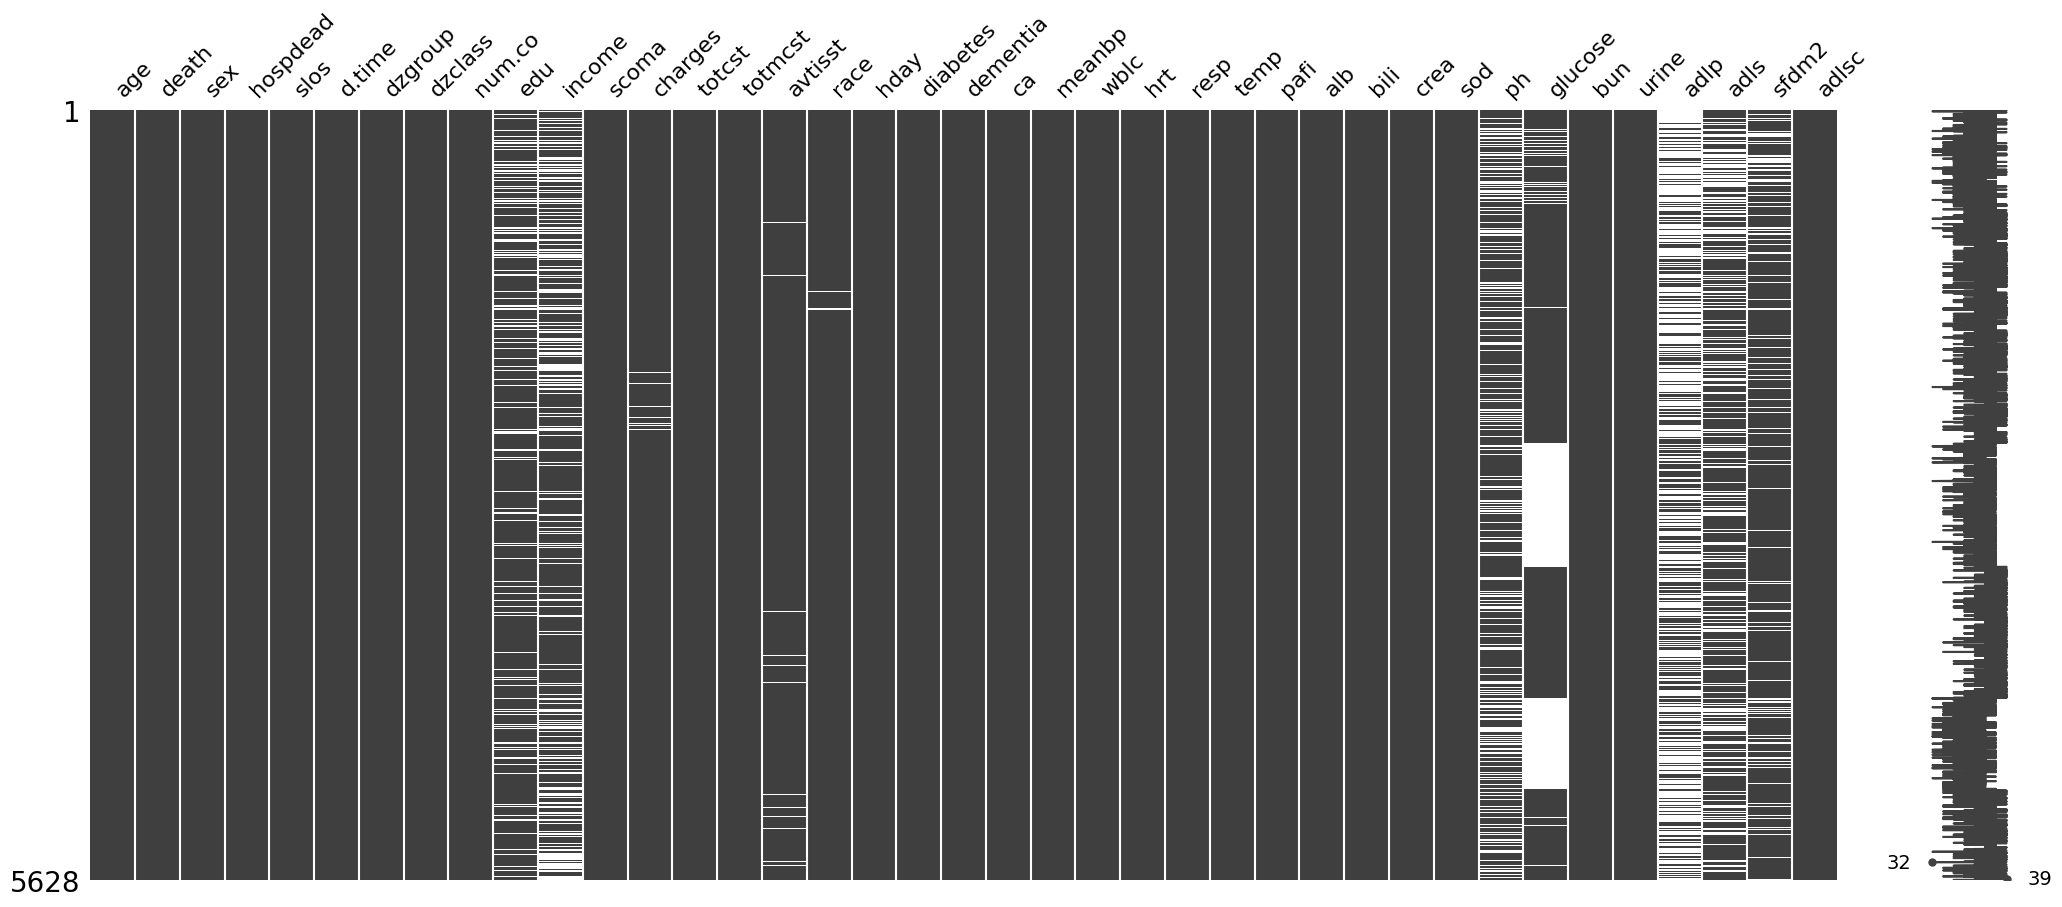

In [89]:
%pip install missingno
import missingno as msno

msno.matrix(data)


In [64]:
data_test = data.copy()

In [69]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9105 entries, 1 to 9105
Data columns (total 47 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       9105 non-null   float64
 1   death     9105 non-null   int64  
 2   sex       9105 non-null   object 
 3   hospdead  9105 non-null   int64  
 4   slos      9105 non-null   int64  
 5   d.time    9105 non-null   int64  
 6   dzgroup   9105 non-null   object 
 7   dzclass   9105 non-null   object 
 8   num.co    9105 non-null   int64  
 9   edu       7471 non-null   float64
 10  income    6123 non-null   object 
 11  scoma     9104 non-null   float64
 12  charges   8933 non-null   float64
 13  totcst    8217 non-null   float64
 14  totmcst   5630 non-null   float64
 15  avtisst   9023 non-null   float64
 16  race      9063 non-null   object 
 17  sps       9104 non-null   float64
 18  aps       9104 non-null   float64
 19  surv2m    9104 non-null   float64
 20  surv6m    9104 non-null   float64
 

In [81]:
data_test_non_categorical = data.select_dtypes(exclude=['object', 'category'])


<Axes: >

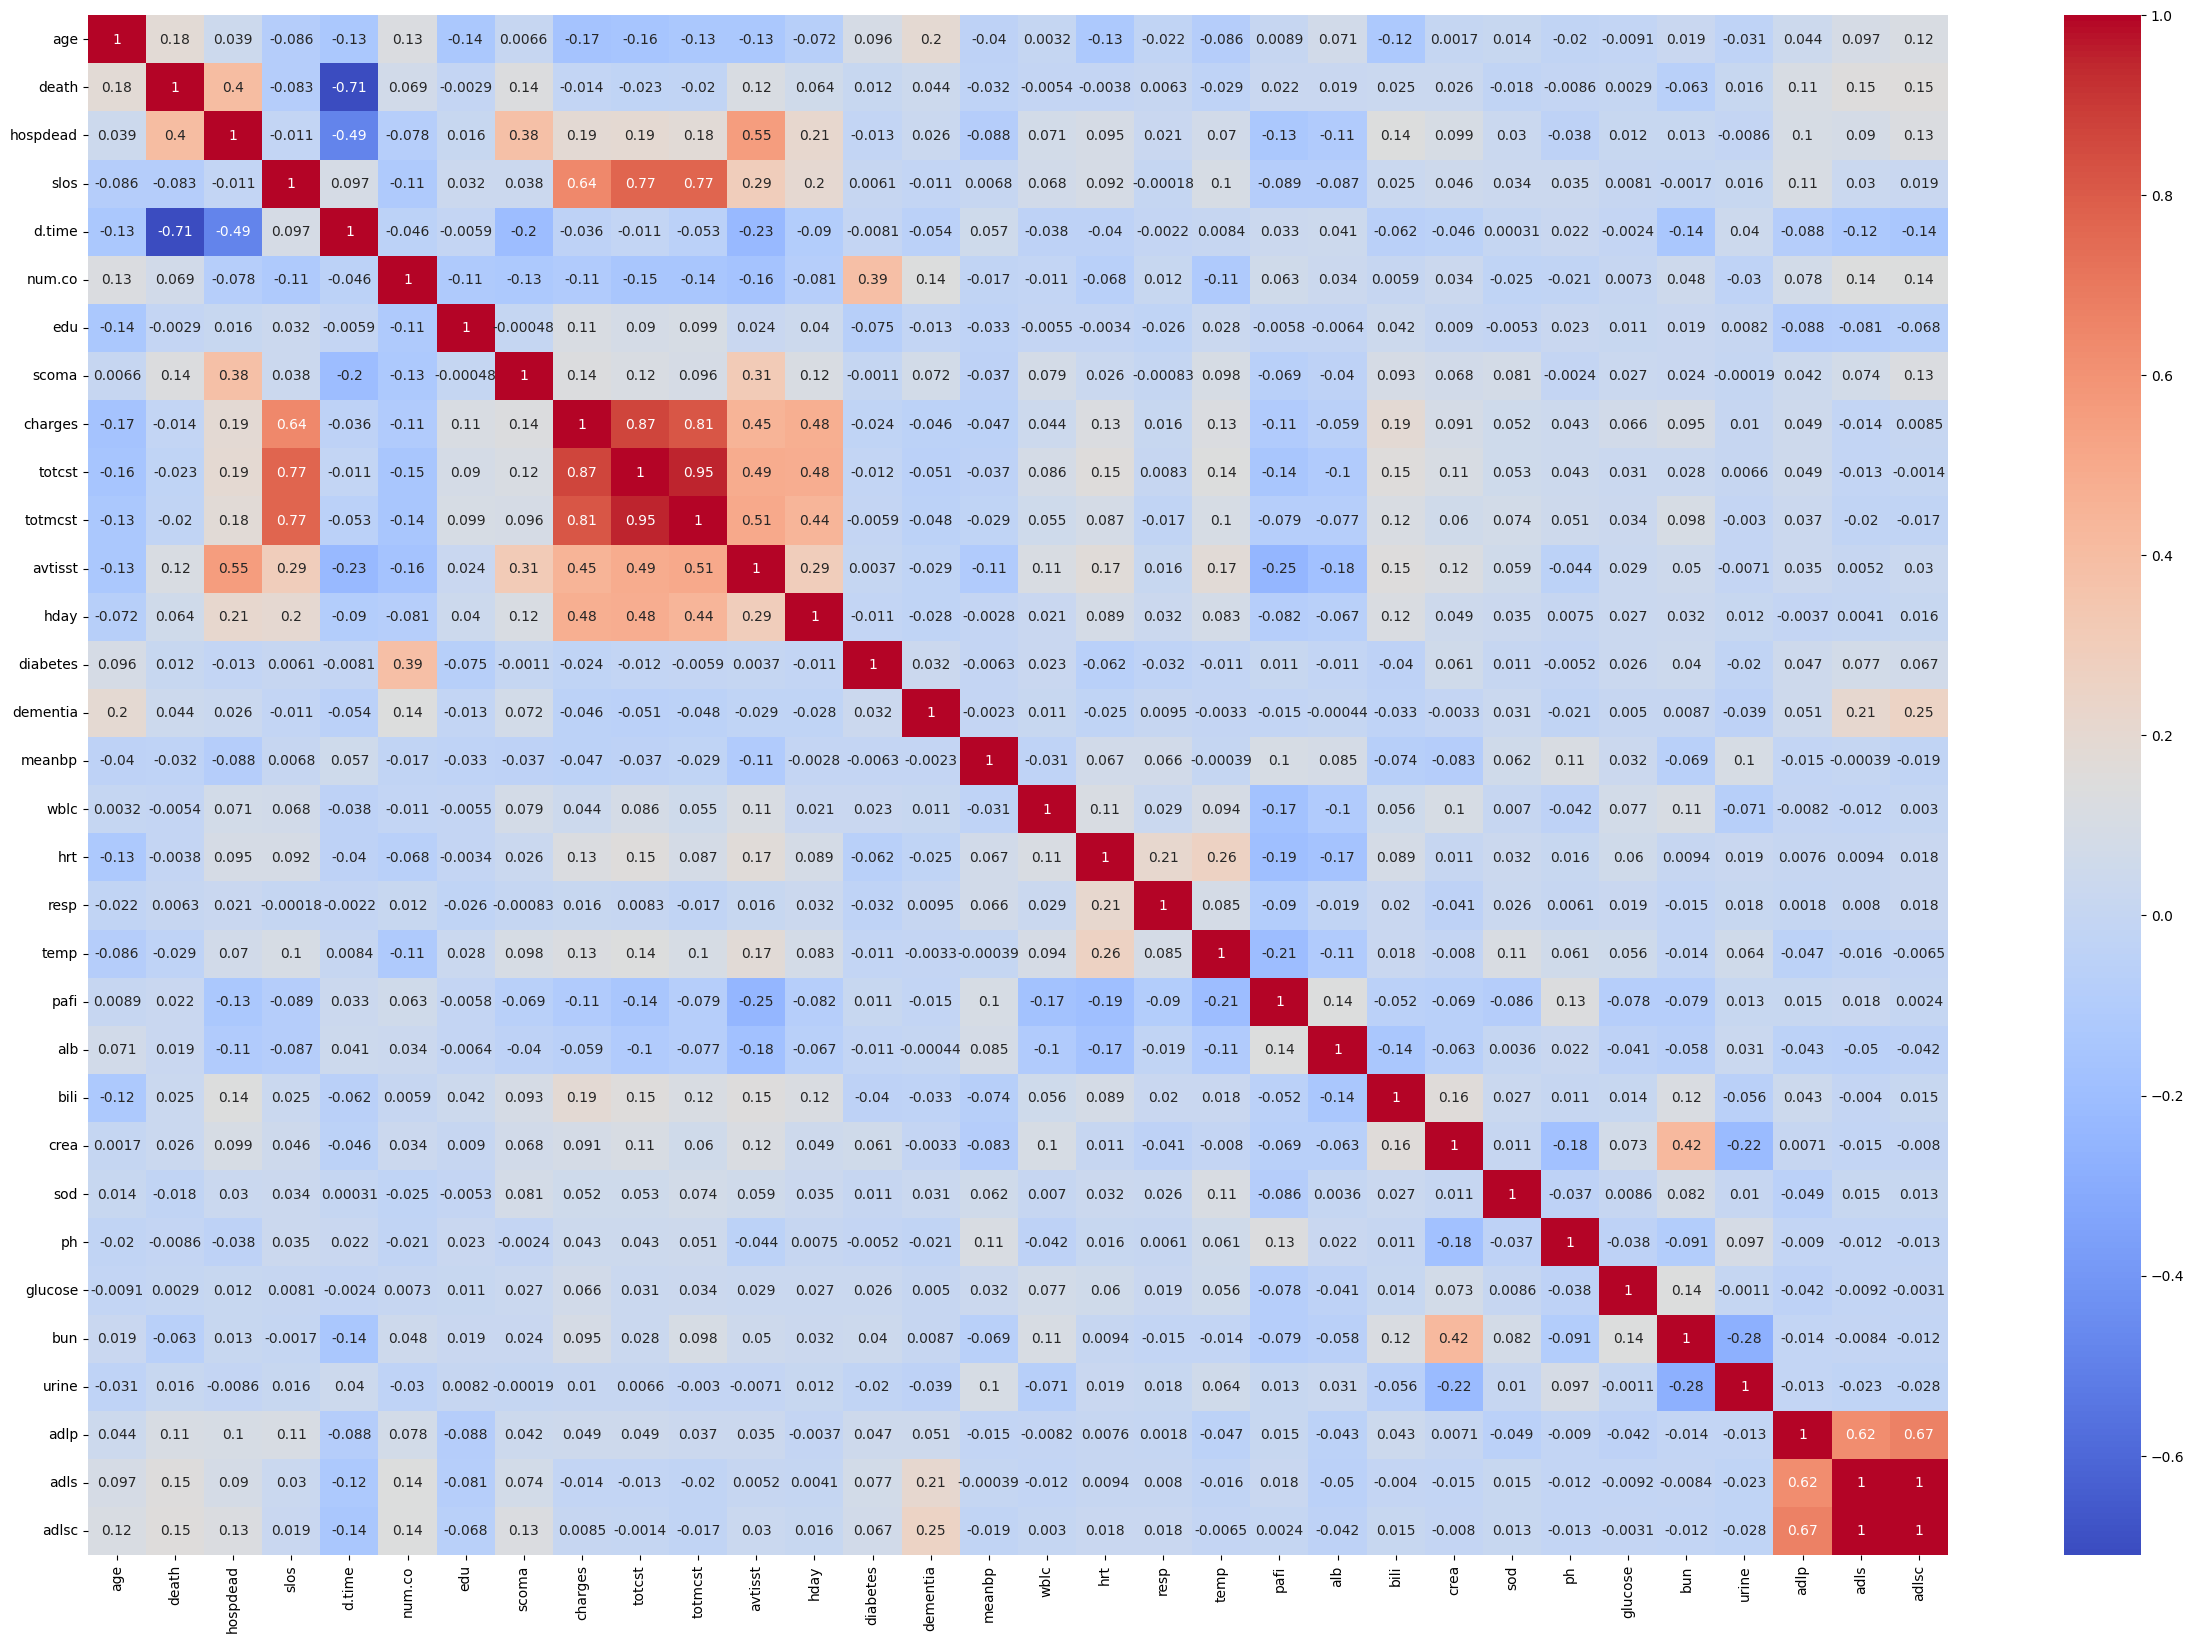

In [82]:
plt.figure(figsize=(30,20))
sns.heatmap(data_test_non_categorical.corr(),cmap="coolwarm", annot= True)


In [61]:
data[(data['sps'].isnull())&(data['charges'].isnull())]


,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,sps,aps,surv2m,surv6m,hday,diabetes,dementia,ca,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
5394,62.52197,1,male,1,3,3,ARF/MOSF w/Sepsis,ARF/MOSF,2,16.0,>$50k,NaN,NaN,NaN,NaN,NaN,white,NaN,NaN,NaN,NaN,1,1,0,no,NaN,NaN,NaN,NaN,55.0,13.099609,110.0,25.0,35.89844,333.3,3.5,1.01,1.799805,133.0,NaN,259.0,60.0,3170.0,NaN,0.0,<2 mo. follow-up,0.0


In [62]:
data['charges'].value_counts(dropna=False)

charges
NaN         172
4510.0        4
9280.0        4
4039.0        3
14896.0       3
           ... 
141244.0      1
8027.0        1
23985.0       1
12558.0       1
15604.0       1
Name: count, Length: 8502, dtype: int64

In [91]:
data.columns

Index(['age', 'death', 'sex', 'hospdead', 'slos', 'd.time', 'dzgroup',
       'dzclass', 'num.co', 'edu', 'income', 'scoma', 'charges', 'totcst',
       'totmcst', 'avtisst', 'race', 'hday', 'diabetes', 'dementia', 'ca',
       'meanbp', 'wblc', 'hrt', 'resp', 'temp', 'pafi', 'alb', 'bili', 'crea',
       'sod', 'ph', 'glucose', 'bun', 'urine', 'adlp', 'adls', 'sfdm2',
       'adlsc'],
      dtype='object')

In [95]:
data.isnull().sum()

age            0
death          0
sex            0
hospdead       0
slos           0
d.time         0
dzgroup        0
dzclass        0
num.co         0
edu          835
income      1617
scoma          0
charges       72
totcst         0
totmcst        0
avtisst       75
race          18
hday           0
diabetes       0
dementia       0
ca             0
meanbp         0
wblc           0
hrt            0
resp           0
temp           0
pafi           0
alb            0
bili           0
crea           0
sod            0
ph          1451
glucose     1765
bun            0
urine          0
adlp        3411
adls        1671
sfdm2        823
adlsc          0
dtype: int64

<Axes: >

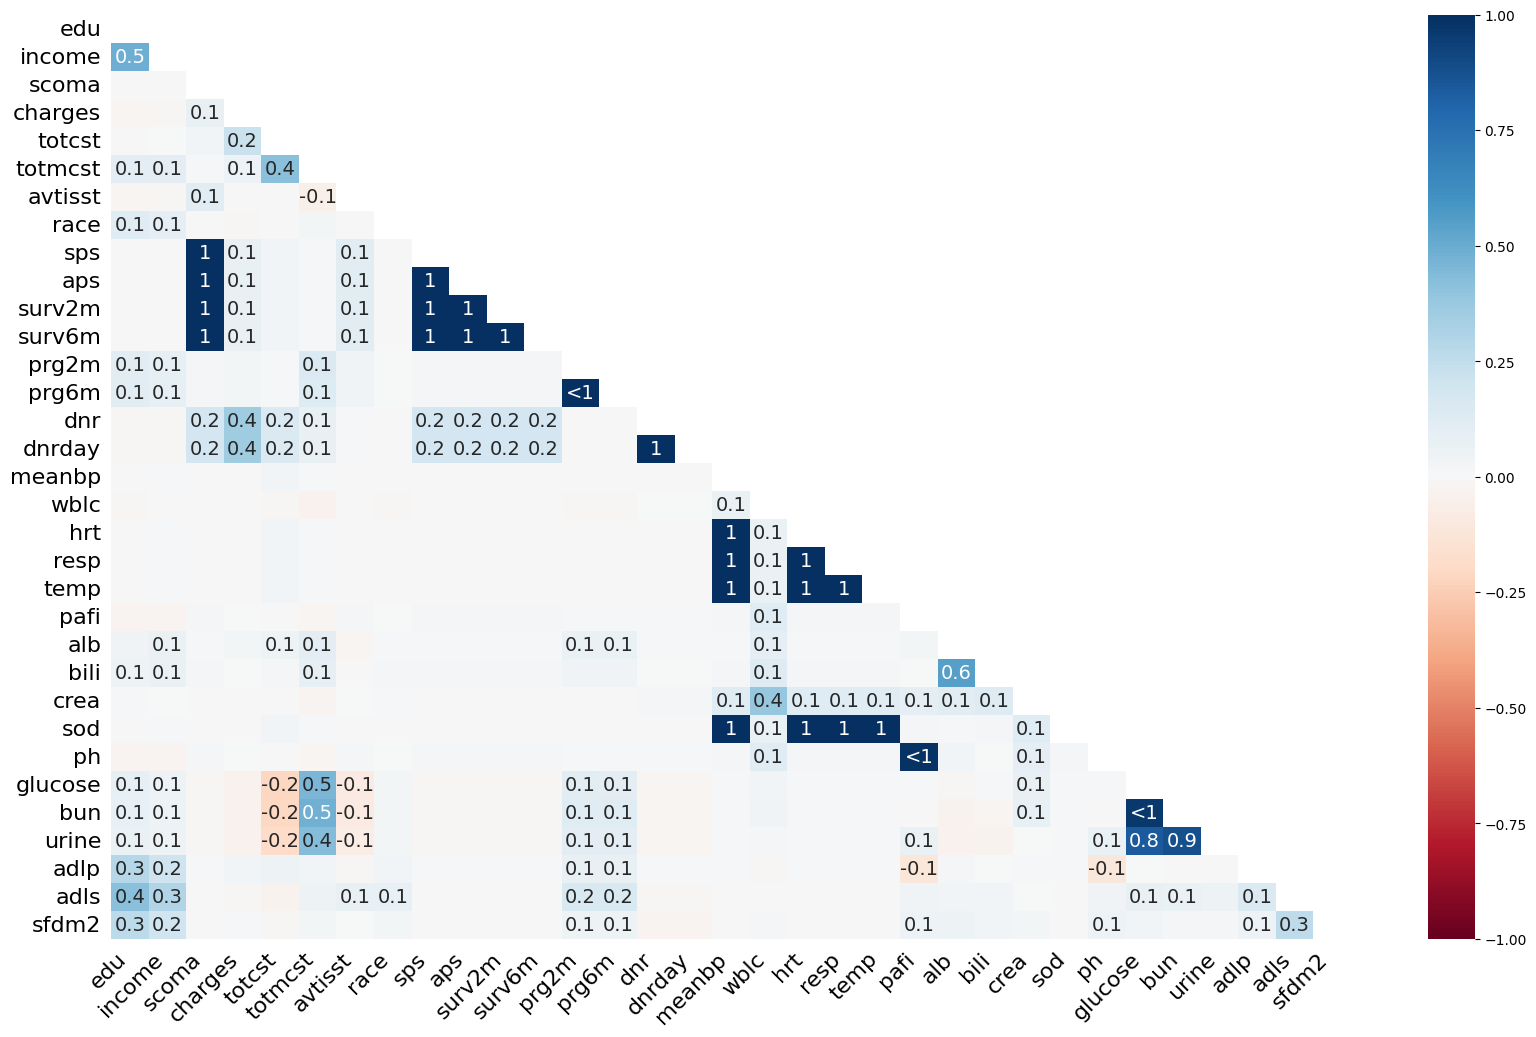

In [122]:
msno.heatmap(data)

<Axes: >

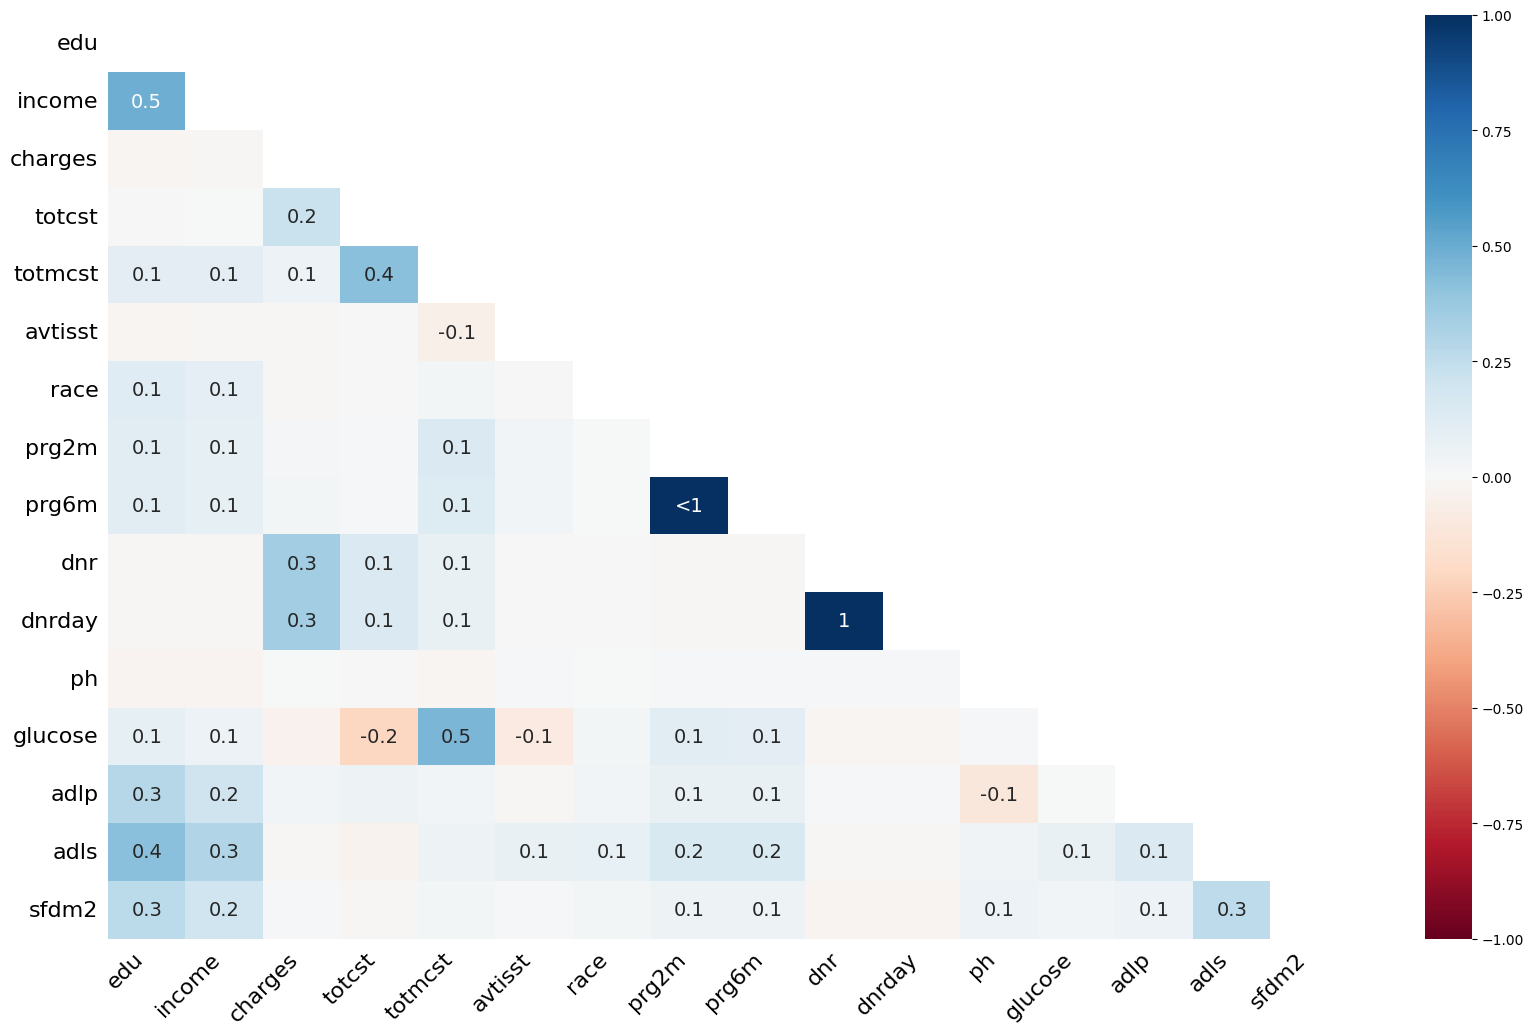

In [67]:
msno.heatmap(data_test[(data_test['sps'].notnull())&(data_test['resp'].notnull())])

## age

Mean of age: 62.65
Standard deviation of age: 15.59
Number of outliers in age: 0
Outliers values:
[]


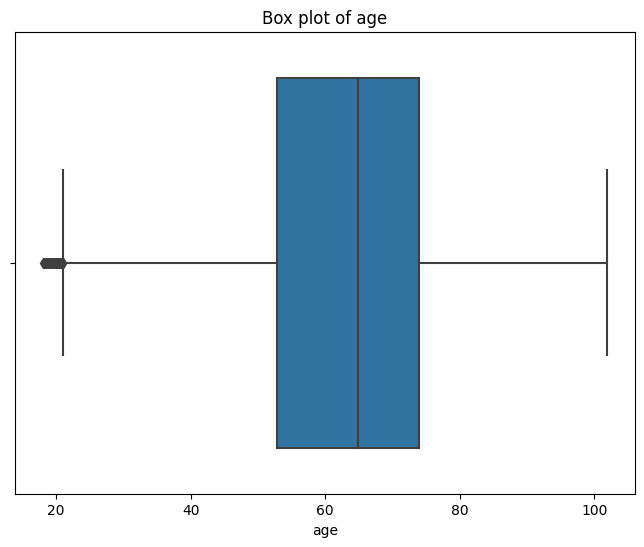

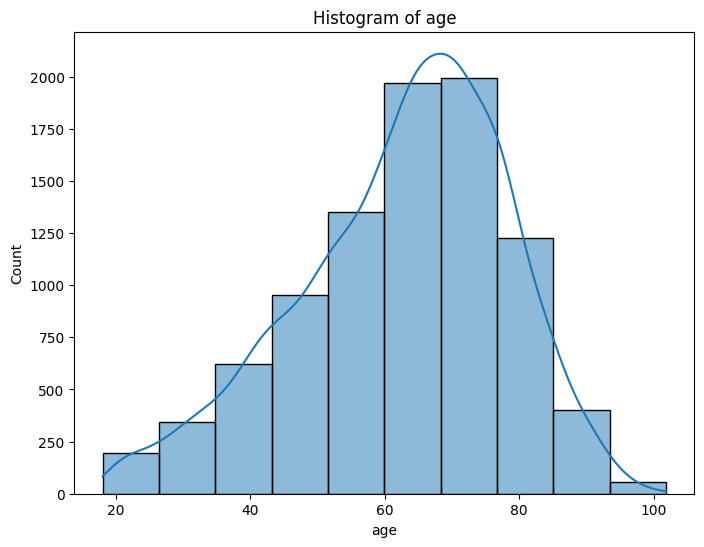

In [33]:
data_exploration(data, 'age')

## death

Counts and percentages of unique values in death:

       Count  Percentage
death                   
1       6201   68.105437
0       2904   31.894563


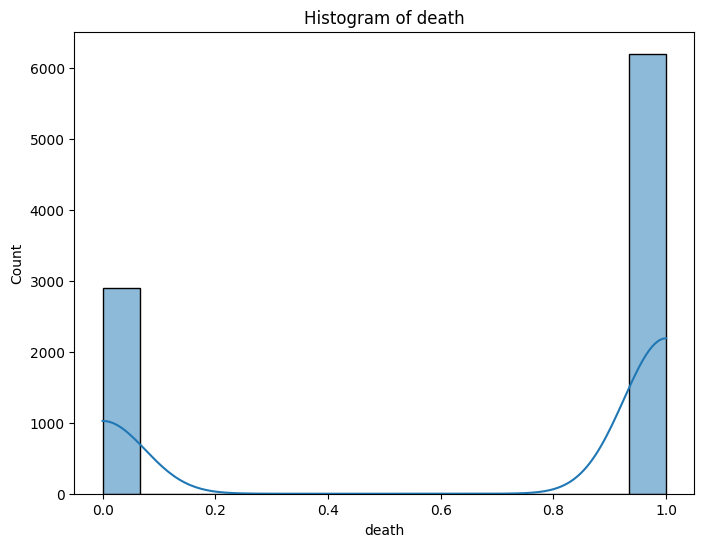

In [34]:
data_exploration(data, 'death')

## sex

Counts and percentages of unique values in sex:

        Count  Percentage
sex                      
male     5125   56.287754
female   3980   43.712246


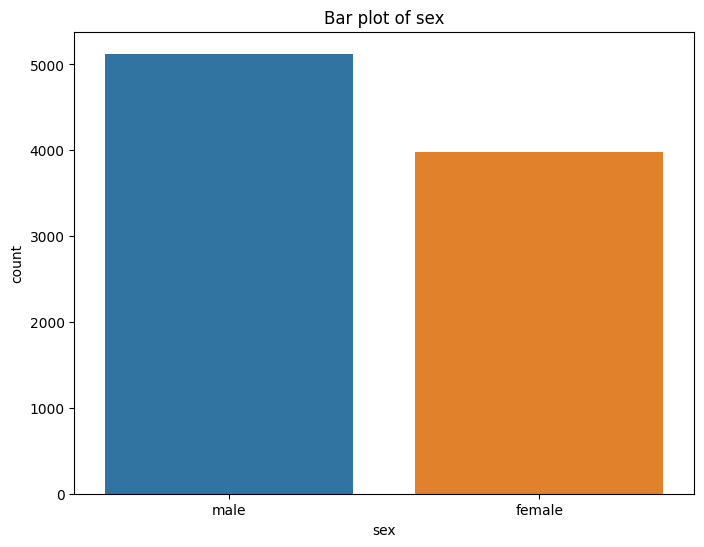

In [35]:
data_exploration(data, 'sex')

## hospdead

Counts and percentages of unique values in hospdead:

          Count  Percentage
hospdead                   
0          6745   74.080176
1          2360   25.919824


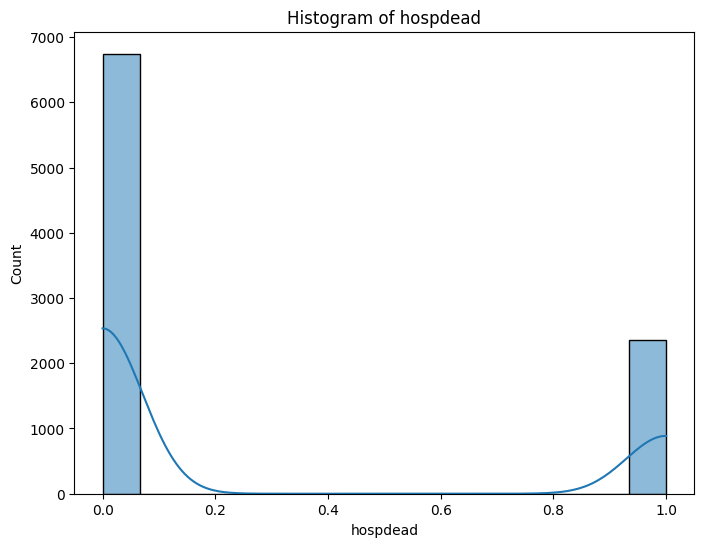

In [36]:
data_exploration(data, 'hospdead')

## slos

Mean of slos: 17.86
Standard deviation of slos: 22.01
Number of outliers in slos: 347
Outliers values:
[115 105  72 120 109  90  85 106 281  96 116  81  76 164  64  73  94  74
 118 145  87  69  93  66 103  99  74 132 124  90  71  82  63  87  91  93
  64  99  73 107  71 110 122  81  94 109  79  93  73  82  81  71  69 107
 127  71  85 118  64  66  73 168  68  86 128 142 172  72  82 114 111 121
  75 121  96 100  63  67  89 142 241  87  93 156  95  88  74 106  87 226
  90 121  76 102  66  75 110 100  76 127  65  66  73  65 154  86  79  82
  67  97 109 136  70  90  77 223 236  84  70  97  71  85 110 103 117  92
  89 245  66 207  90  77 113 134 129 134  88  67  68  77  65  95  93  81
  69  73  91 117 145 192 171  78 148 261  99  75  76  77 116 100  81 109
  87  90 106  81 101 110  74 113  79  93  78  87  87  63 126  71  69  63
  65  74 185  63  66 113  69  68  86 105 110  71 101  94 140 156 102  96
  72  67 107  69  73  73  89  75  88 122  76 111  79  68 104  76  64 106
 113  63 121 339 112 

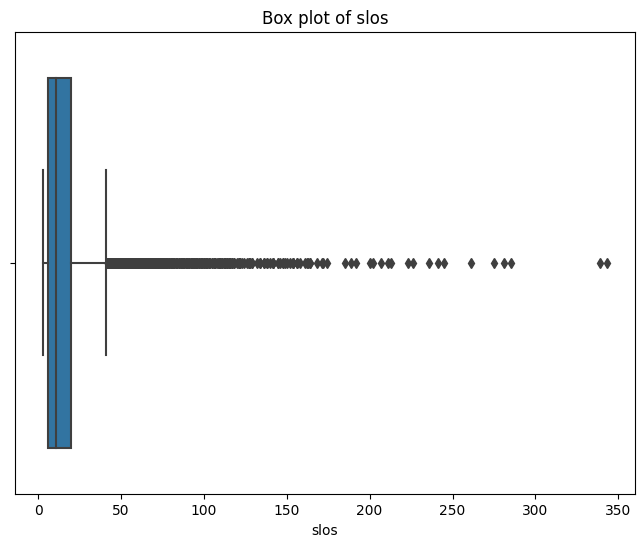

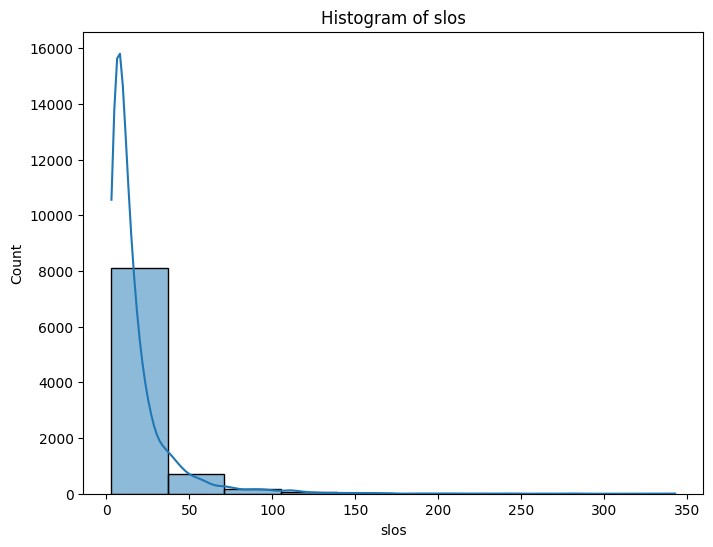

In [37]:
data_exploration(data, 'slos')

In [38]:
data.value_counts('slos', dropna= False).sort_index()

slos
3      347
4      656
5      688
6      632
7      643
      ... 
275      1
281      1
285      1
339      1
343      1
Name: count, Length: 167, dtype: int64

## d.time

Mean of d.time: 478.45
Standard deviation of d.time: 560.38
Number of outliers in d.time: 0
Outliers values:
[]


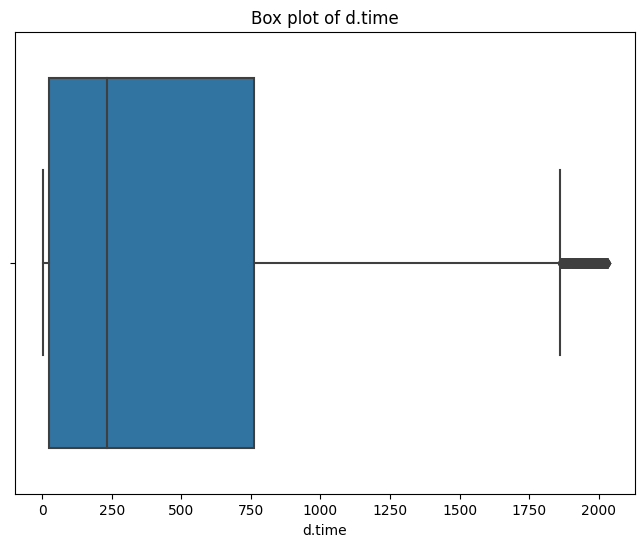

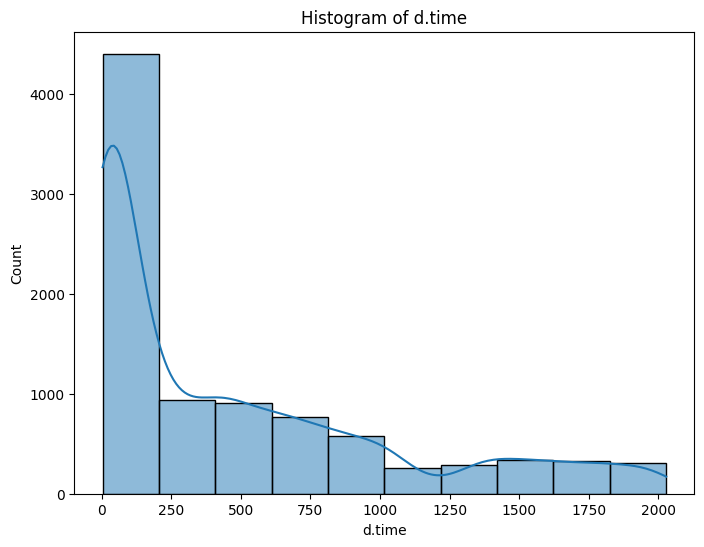

In [39]:
data_exploration(data, 'd.time')

## dzgroup

Counts and percentages of unique values in dzgroup:

                   Count  Percentage
dzgroup                             
ARF/MOSF w/Sepsis   3515   38.605162
CHF                 1387   15.233388
COPD                 967   10.620538
Lung Cancer          908    9.972543
MOSF w/Malig         712    7.819879
Coma                 596    6.545854
Colon Cancer         512    5.623284
Cirrhosis            508    5.579352


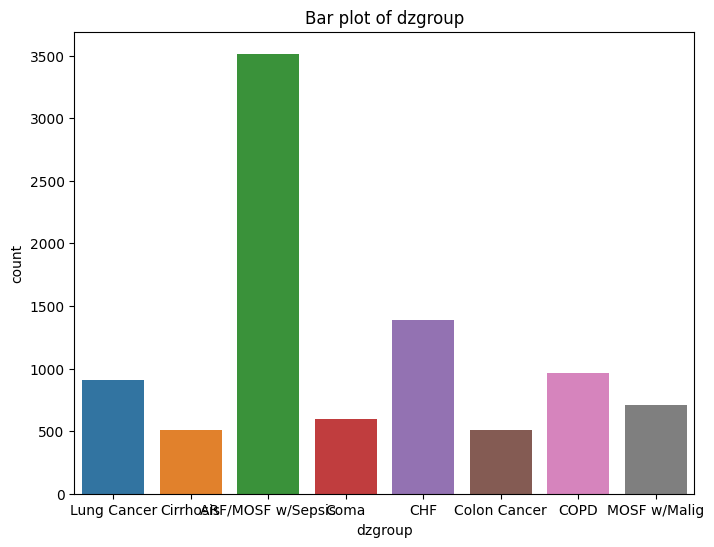

In [40]:
data_exploration(data, 'dzgroup')

## dzclass

Counts and percentages of unique values in dzclass:

                    Count  Percentage
dzclass                              
ARF/MOSF             4227   46.425041
COPD/CHF/Cirrhosis   2862   31.433278
Cancer               1420   15.595826
Coma                  596    6.545854


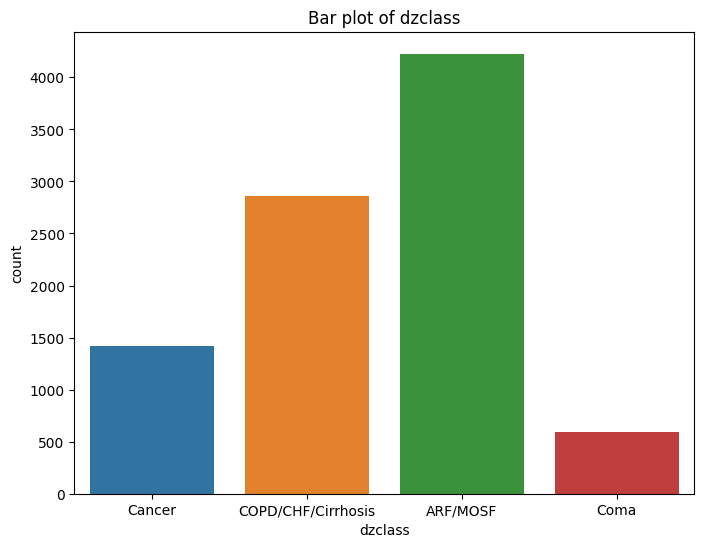

In [41]:
data_exploration(data, 'dzclass')

## num.co

Mean of num.co: 1.87
Standard deviation of num.co: 1.34
Number of outliers in num.co: 0
Outliers values:
[]


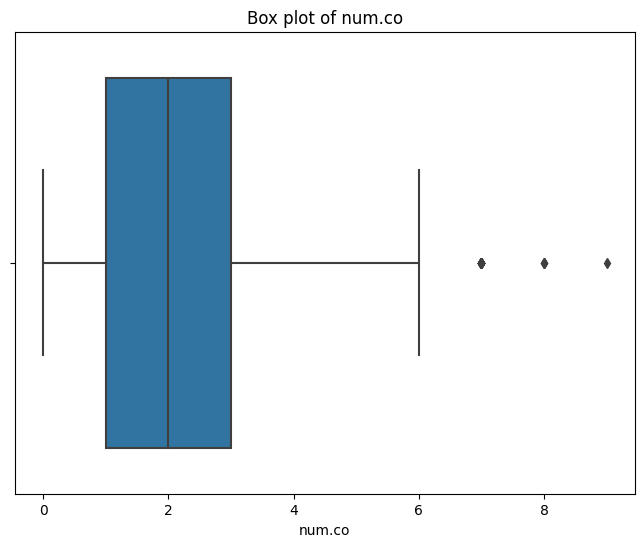

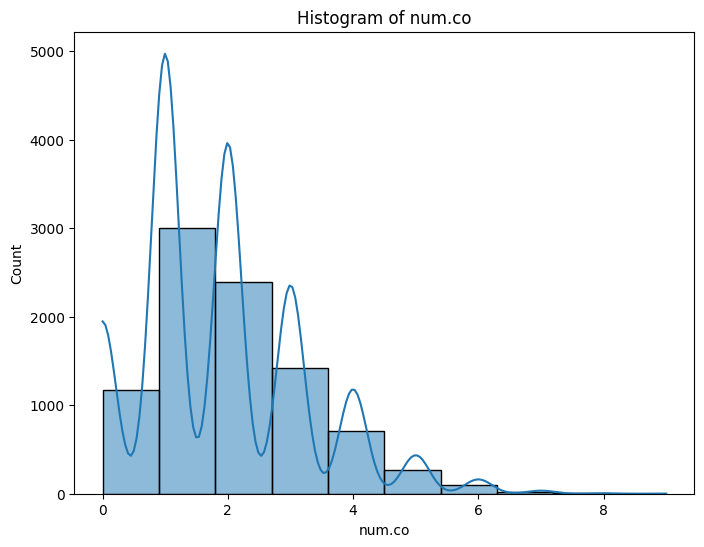

In [42]:
data_exploration(data, 'num.co')

## edu

Mean of edu: 11.75
Standard deviation of edu: 3.45
Number of outliers in edu: 6
Outliers values:
[30. 27. 31. 27. 30. 28.]


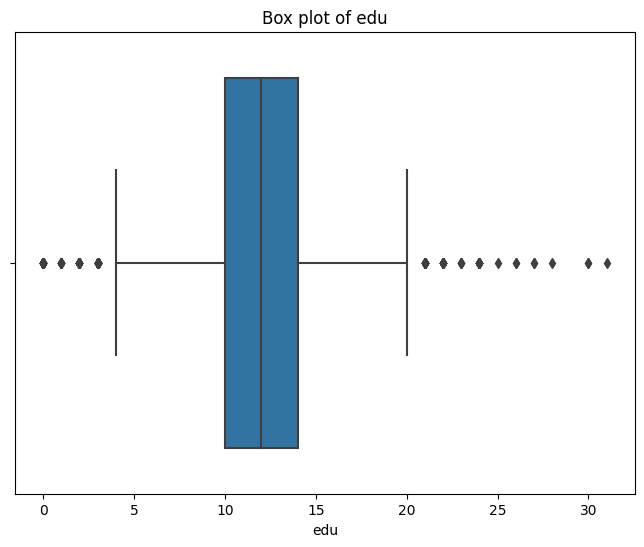

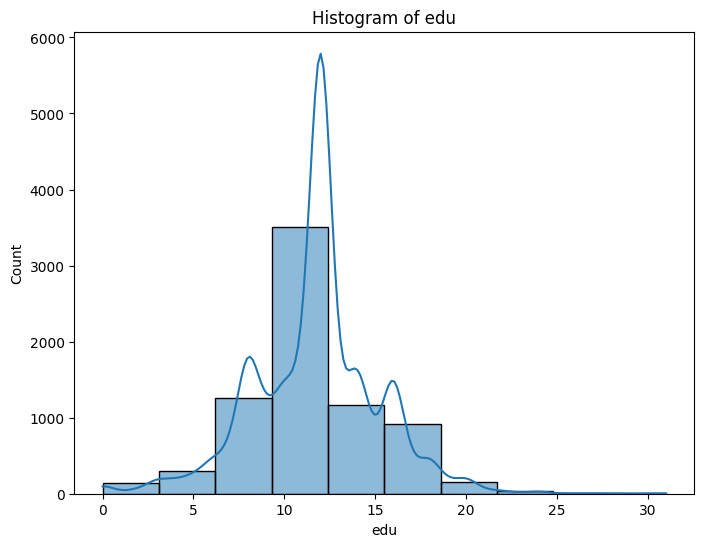

In [43]:
data_exploration(data, 'edu')

In [ ]:
#fill with median
data['edu'] = data['edu'].fillna(data['edu'].median())

In [45]:
data.value_counts('edu', dropna=False).sort_index(ascending=False)

edu
31.0       1
30.0       2
28.0       1
27.0       2
26.0       2
25.0       1
24.0      12
23.0       4
22.0      14
21.0      18
20.0      78
19.0      52
18.0     176
17.0     113
16.0     623
15.0     200
14.0     637
13.0     328
12.0    2524
11.0     481
10.0     505
9.0      343
8.0      718
7.0      192
6.0      156
5.0       83
4.0       63
3.0       68
2.0       22
1.0        9
0.0       43
NaN     1634
Name: count, dtype: int64

## income

Counts and percentages of unique values in income:

            Count  Percentage
income                       
under $11k   2855   46.627470
$11-$25k     1527   24.938756
$25-$50k     1057   17.262780
>$50k         684   11.170995


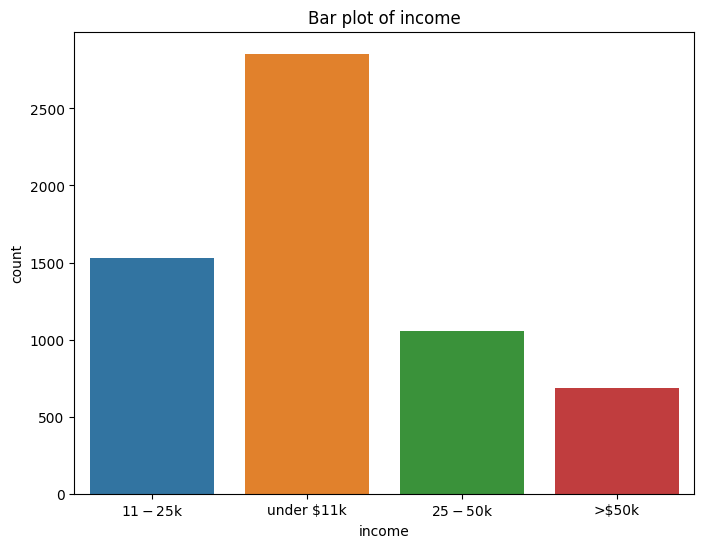

In [46]:
data_exploration(data, 'income')
#predictive imputation

In [47]:
data['income'].nunique()

4

In [47]:
data.value_counts('income', dropna=False).sort_index(ascending=False)

income
under $11k    2855
>$50k          684
$25-$50k      1057
$11-$25k      1527
NaN           2982
Name: count, dtype: int64

## scoma

Mean of scoma: 12.06
Standard deviation of scoma: 24.64
Number of outliers in scoma: 1516
Outliers values:
[44. 55. 44. ... 44. 44. 41.]


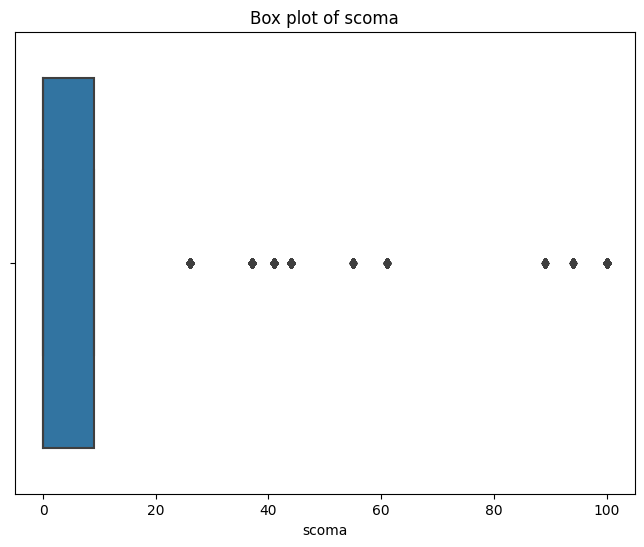

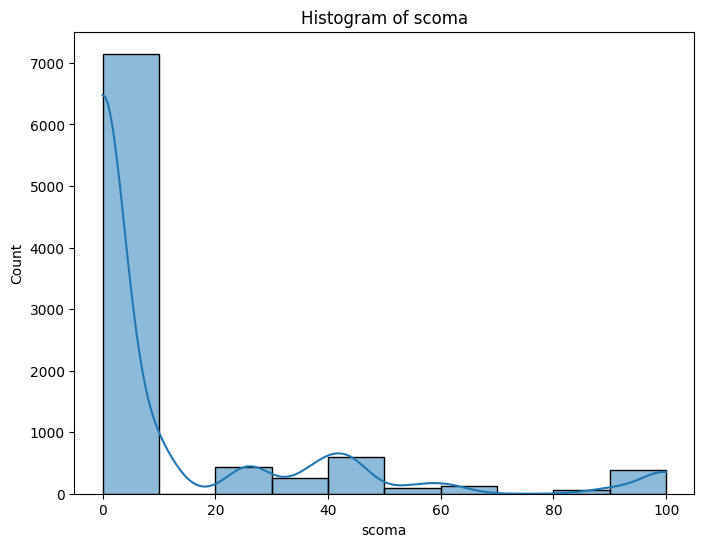

In [48]:
data_exploration(data, 'scoma')
#drop the one row with missing value


In [52]:
data['scoma'].value_counts(dropna=False).sort_index(ascending=False)

scoma
100.0     331
94.0       61
89.0       54
61.0      128
55.0       98
44.0      399
41.0      194
37.0      251
26.0      439
9.0       748
0.0      6401
NaN         1
Name: count, dtype: int64

## charges

Mean of charges: 59995.79
Standard deviation of charges: 102648.78
Number of outliers in charges: 447
Outliers values:
[ 706577.     283303.     542266.     465380.     271250.     348931.
  230733.     320843.     321716.     538692.     302353.     397017.
  231119.     283145.     433684.     483991.     229314.     506141.
  740010.     274531.     256835.     392950.     279530.     268805.
  469824.     641888.     277421.     970982.    1273347.     943804.
  254366.     592486.     659433.     330735.     413774.     409250.
  266998.     348628.     922581.     536925.     786088.     245347.
  260829.     306038.     463001.     260514.     257589.     481475.
  241565.     603388.     352017.     372459.     597427.     271731.
  237244.     370093.     242746.     269517.     303548.     414803.
  303934.     353422.     254601.     239683.     359124.     448431.
  542326.     444556.    1435423.     565876.     480519.     349052.
  374053.     563075.     283844.     308

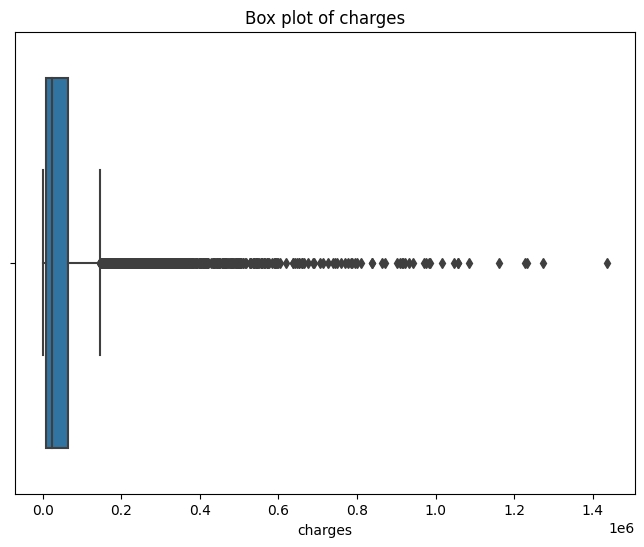

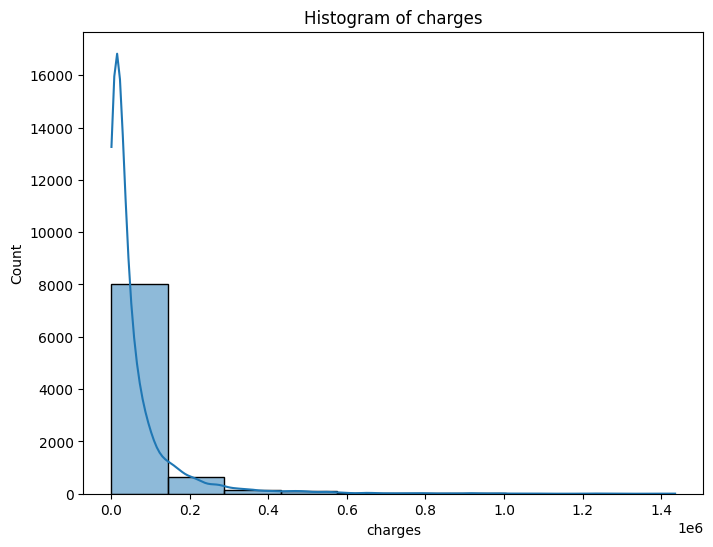

In [53]:
data_exploration(data, 'charges')
#predictive imputation

In [113]:
data['totmcst'].value_counts(dropna=False,ascending=True).sort_index()


totmcst
-102.71997          1
-28.48000           1
 0.00000          102
 402.90991          1
 470.62988          1
                 ... 
 494838.00000       1
 505211.00000       1
 528444.00000       1
 710682.00000       1
 NaN             3475
Name: count, Length: 5517, dtype: int64

In [110]:
data.shape

(9105, 39)

In [111]:
data[data['totmcst'] < 0]

,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,hday,diabetes,dementia,ca,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
7763,65.69196,1,male,0,25,26,ARF/MOSF w/Sepsis,ARF/MOSF,1,NaN,NaN,0.0,206035.0,79364.5625,-102.71997,38.25,white,69,0,0,no,151.0,15.798828,146.0,32.0,39.19531,282.0,2.199707,0.899902,4.599609,141.0,7.429688,NaN,NaN,NaN,NaN,NaN,<2 mo. follow-up,2.108887
7783,63.12097,1,male,0,13,39,ARF/MOSF w/Sepsis,ARF/MOSF,0,12.0,NaN,0.0,17871.0,16333.0469,-28.48000,21.50,white,14,0,0,no,150.0,11.099609,56.0,16.0,35.59375,NaN,NaN,NaN,3.899902,138.0,NaN,NaN,NaN,NaN,0.0,0.0,<2 mo. follow-up,0.000000


In [112]:
data[data['totmcst'] >= 0].shape

(5628, 39)

In [115]:
data = data[(data['totmcst']!= -102.71997)& (data['totmcst'] != -28.48000) ]

In [121]:
data[data['hrt'].isnull()]


,age,death,sex,hospdead,slos,d.time,dzgroup,dzclass,num.co,edu,income,scoma,charges,totcst,totmcst,avtisst,race,sps,aps,surv2m,surv6m,hday,diabetes,dementia,ca,prg2m,prg6m,dnr,dnrday,meanbp,wblc,hrt,resp,temp,pafi,alb,bili,crea,sod,ph,glucose,bun,urine,adlp,adls,sfdm2,adlsc
5441,55.52597,1,female,0,47,56,ARF/MOSF w/Sepsis,ARF/MOSF,2,12.0,NaN,0.0,92466.0,NaN,NaN,26.25,white,31.398438,60.0,0.7229,0.638916,1,1,0,no,0.8,0.8,no dnr,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,<2 mo. follow-up,7.0


<Axes: >

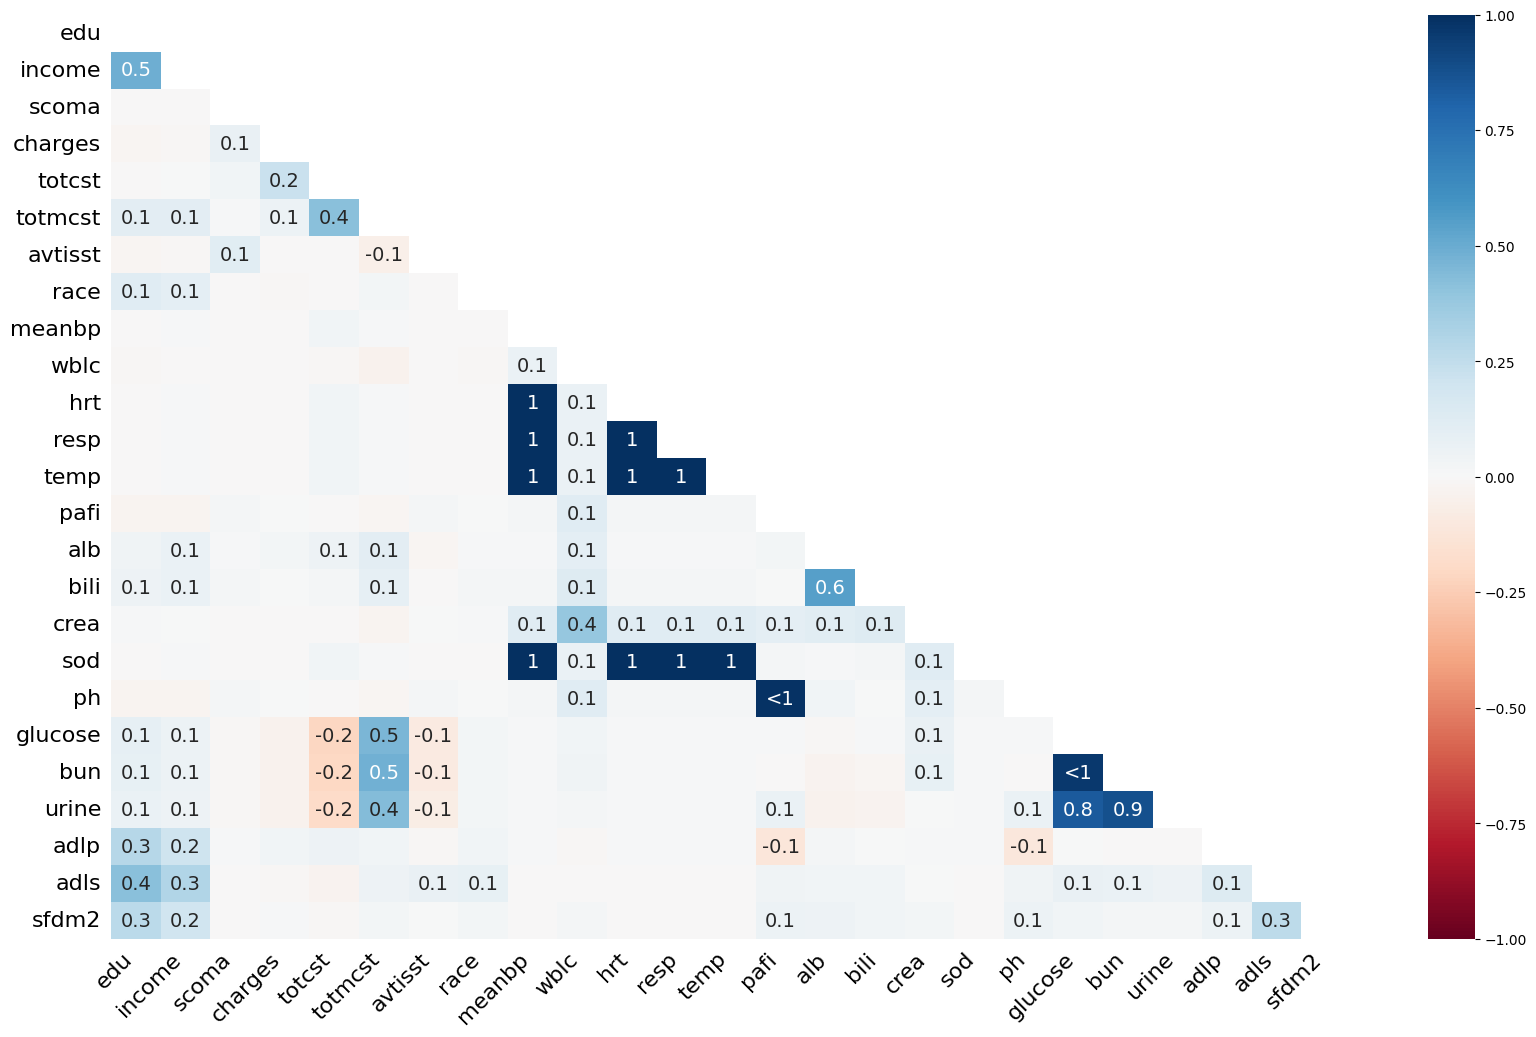

In [116]:
msno.heatmap(data)

## totcst

Mean of totcst: 30825.87
Standard deviation of totcst: 45780.82
Number of outliers in totcst: 327
Outliers values:
[390460.5   156674.125 288592.25  304749.25  136387.875 173763.5
 165178.875 162087.25  301788.5   155929.75  207528.5   214329.25
 285715.25  272995.25  357918.75  165149.    197040.125 180716.375
 132976.5   232752.25  328378.5   133680.875 134573.25  633212.
 473212.25  144957.75  139701.25  298585.25  324373.75  128401.812
 177669.875 268835.5   421848.5   129712.875 165393.375 269057.
 173060.625 247740.75  129540.125 324555.    237611.75  185530.625
 312839.5   130874.125 215823.25  183324.25  156722.375 185368.625
 139610.125 190804.    168043.625 236295.25  233671.25  341404.25
 180218.625 136717.875 174356.5   129202.75  212786.5   275272.75
 182175.25  211648.875 276147.5   133509.5   483556.25  186497.75
 183641.75  137584.625 131152.125 352231.25  201105.75  199117.25
 148681.25  138869.5   216298.25  136256.625 463356.75  228884.625
 274269.75  131754.125 1807

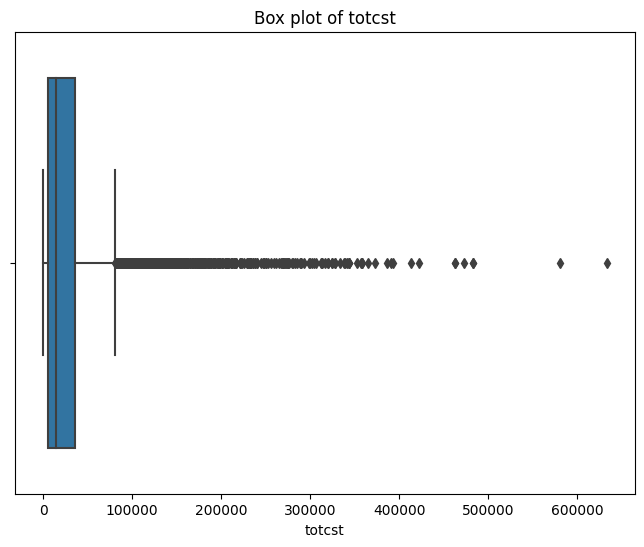

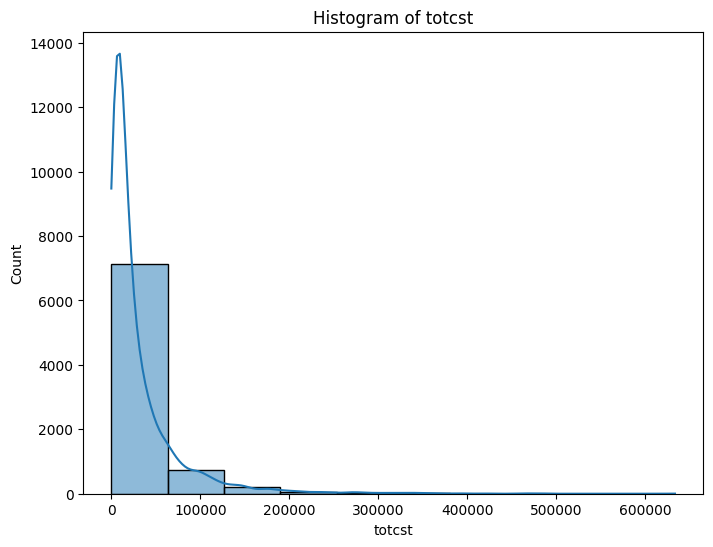

In [55]:
data_exploration(data, 'totcst')
#ratio of totmcst and charges, can be done better by imputing the other two and remaking this column 
#or just dropping it or the other two after computing

In [61]:
data['totcst'].value_counts(dropna=False,ascending=False).sort_index()
#cant be zero, cause its a ratio 
#drop columns with zero or impute with predictive guesses 

totcst
0.0000          17
39.4960          1
93.8955          1
420.3059         1
562.8140         1
              ... 
483192.5000      1
483556.2500      1
581140.0000      1
633212.0000      1
NaN            888
Name: count, Length: 8198, dtype: int64

## totmcst

Mean of totmcst: 28828.88
Standard deviation of totmcst: 43604.26
Number of outliers in totmcst: 225
Outliers values:
[134474.75  205850.25  159476.75  200250.125 200240.375 154506.25
 189590.375 127205.188 374988.5   216081.625 200351.25  135325.125
 171166.25  175344.5   128462.438 152019.375 127812.75  145548.125
 130626.312 403864.75  204853.625 259698.125 140814.375 234875.
 329348.75  190487.75  165394.125 208533.75  165328.875 132617.125
 168425.75  129080.562 138829.5   213677.5   127801.062 505211.
 528444.    321893.5   235552.125 156396.75  190491.625 152409.25
 303778.5   189351.5   133639.125 137877.375 131994.875 165700.25
 126851.562 180428.125 141648.125 208260.125 135322.875 203412.75
 225433.625 155250.5   157278.375 152781.125 225256.125 355017.75
 202004.    132201.875 140531.625 132413.375 138522.    146630.375
 140280.125 179734.125 149915.625 121448.562 166759.125 164658.375
 184564.75  129240.75  159707.125 135075.75  128066.688 237194.25
 205494.25  144530.25  

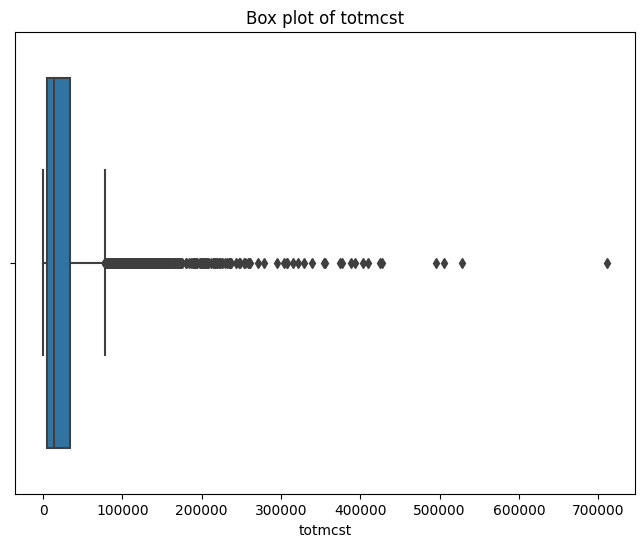

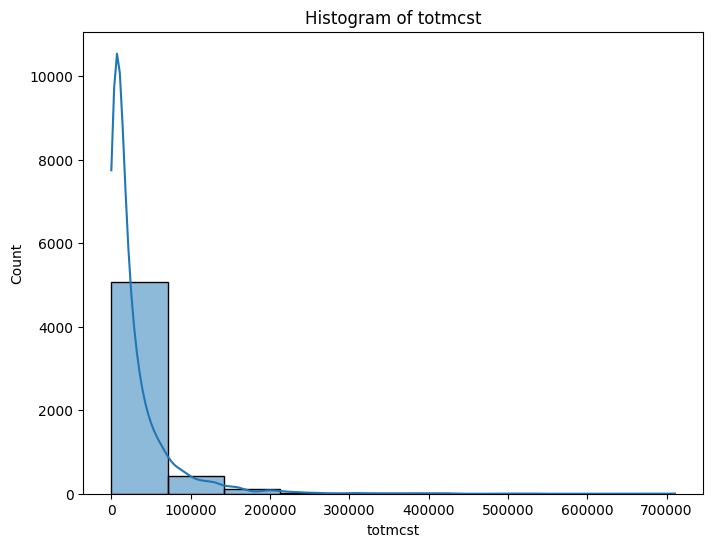

In [57]:
data_exploration(data, 'totmcst')

In [60]:
data['totmcst'].value_counts(dropna=False,ascending=False).sort_index()

totmcst
-102.71997          1
-28.48000           1
 0.00000          102
 402.90991          1
 470.62988          1
                 ... 
 494838.00000       1
 505211.00000       1
 528444.00000       1
 710682.00000       1
 NaN             3475
Name: count, Length: 5517, dtype: int64

In [ ]:
#drop the row with minus totmcst 
#total micro cost cannot be minus 


## avtisst

Mean of avtisst: 22.61
Standard deviation of avtisst: 13.23
Number of outliers in avtisst: 0
Outliers values:
[]


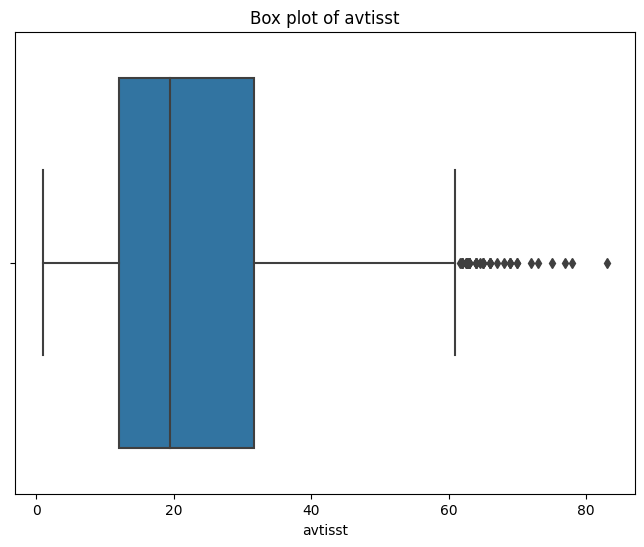

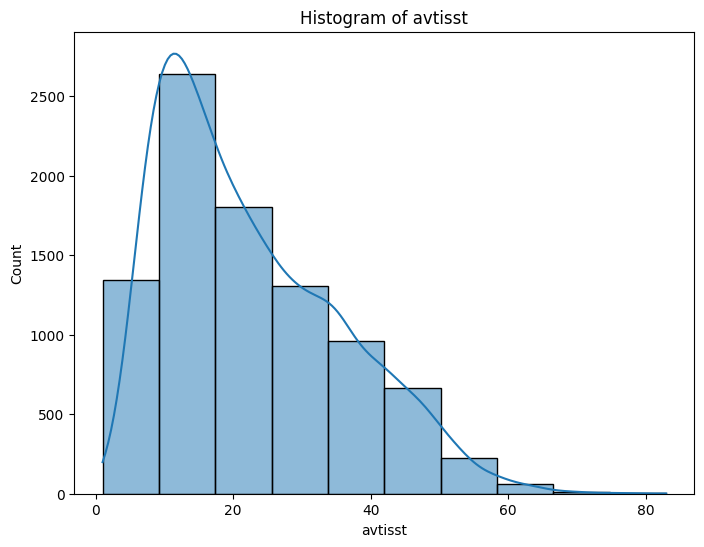

In [59]:
data_exploration(data, 'avtisst')
#predictive better guesses

In [64]:
data['avtisst'].value_counts(dropna=False, ascending=False).sort_index

<bound method Series.sort_index of avtisst
11.000000    246
10.000000    227
12.000000    225
13.000000    214
9.000000     214
            ... 
61.666657      1
58.333313      1
6.750000       1
3.250000       1
3.333332       1
Name: count, Length: 353, dtype: int64>

## race

Counts and percentages of unique values in race:

          Count  Percentage
race                       
white      7191   79.344588
black      1391   15.348119
hispanic    290    3.199823
other       112    1.235794
asian        79    0.871676


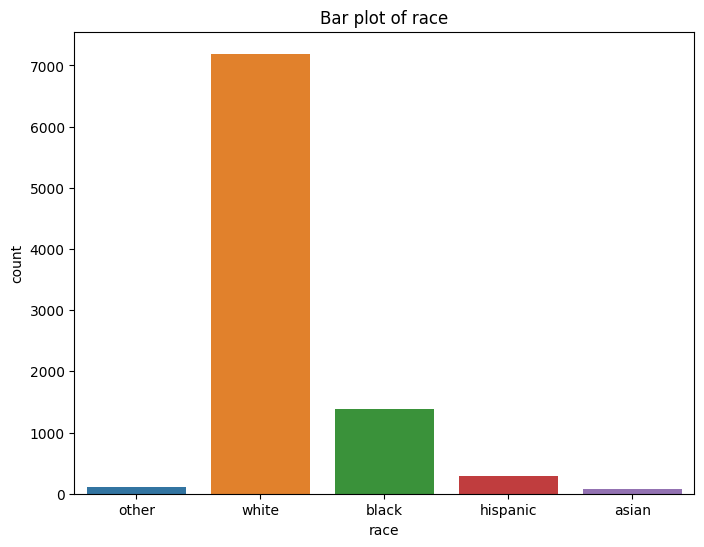

In [65]:
data_exploration(data, 'race')
#impute with mode 


## sps

Mean of sps: 25.53
Standard deviation of sps: 9.90
Number of outliers in sps: 70
Outliers values:
[69.296875 88.390625 70.09375  74.       66.5      66.       75.1875
 69.390625 73.1875   85.1875   69.5      69.890625 72.1875   81.6875
 67.796875 75.890625 78.1875   78.09375  70.59375  79.       71.
 69.6875   66.796875 84.390625 74.59375  76.       73.       75.796875
 81.796875 80.       76.6875   74.09375  75.390625 81.09375  75.296875
 76.6875   79.59375  76.6875   78.390625 77.890625 89.6875   73.296875
 73.390625 79.6875   81.6875   66.296875 99.1875   69.296875 95.59375
 78.390625 65.390625 78.1875   65.796875 98.       71.1875   64.5
 74.5      69.6875   79.59375  79.1875   64.796875 66.390625 83.6875
 85.09375  79.1875   91.09375  87.5      85.5      75.5      82.390625]


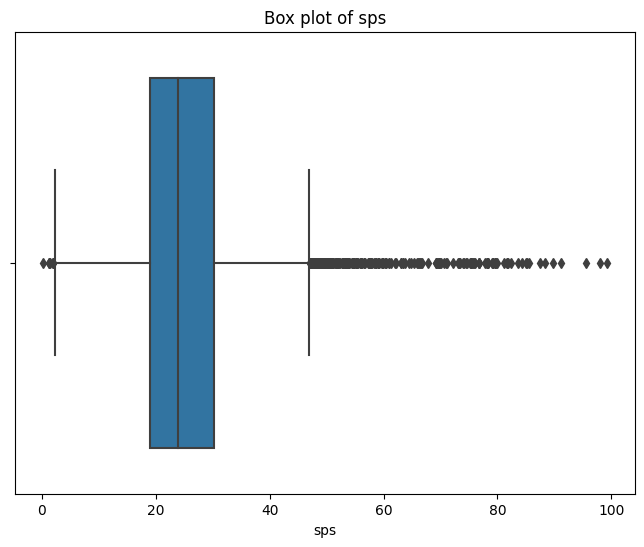

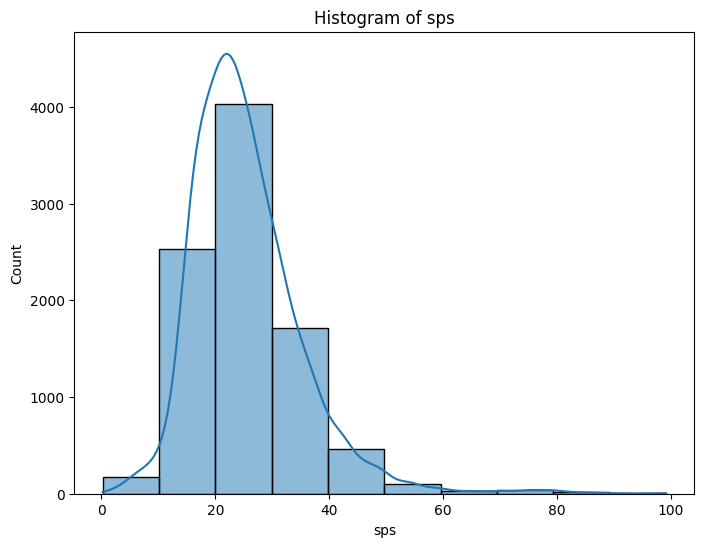

In [67]:
data_exploration(data, 'sps')
#not to be used as a predictor 
#drop one missing row 

## aps

Mean of aps: 37.60
Standard deviation of aps: 19.90
Number of outliers in aps: 5
Outliers values:
[133. 129. 141. 129. 143.]


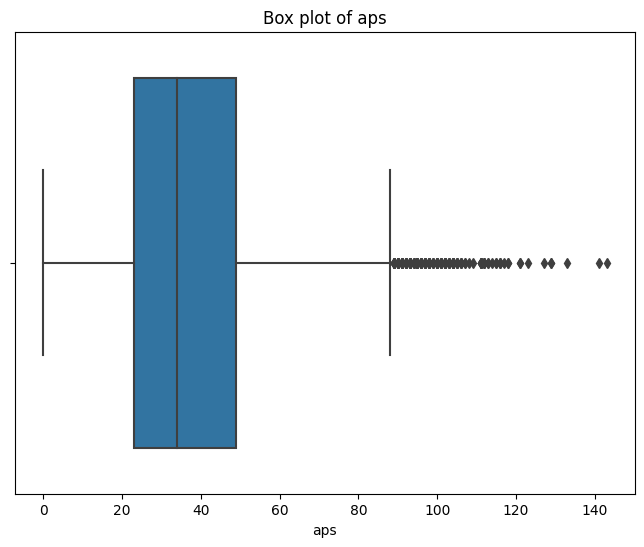

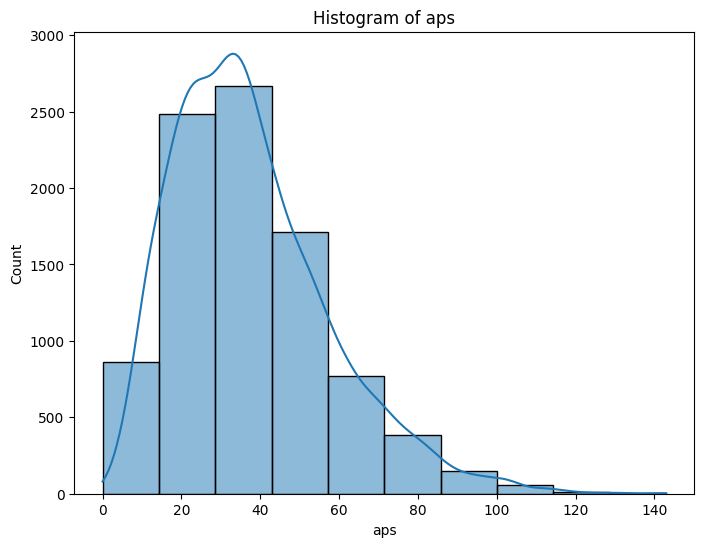

In [68]:
data_exploration(data, 'aps')
#not to be used as a predictor 
#drop one missing row 

## surv2m

Mean of surv2m: 0.64
Standard deviation of surv2m: 0.25
Number of outliers in surv2m: 0
Outliers values:
[]


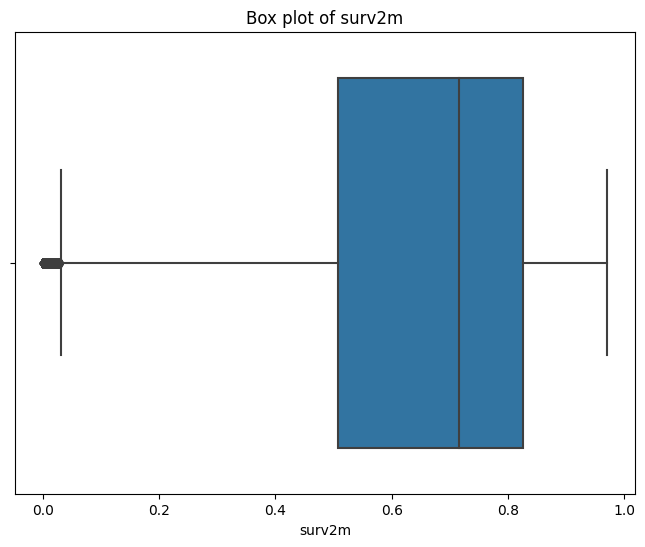

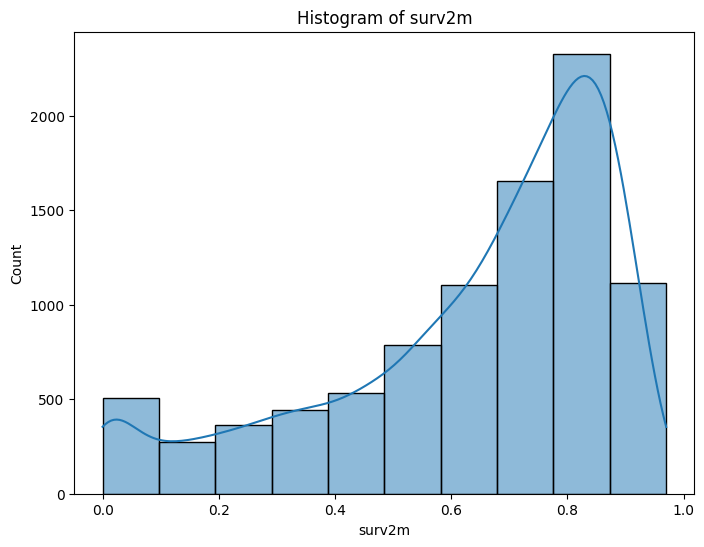

In [69]:
data_exploration(data, 'surv2m')
#not to be used as a predictor
#drop one missing row 

## surv6m

Mean of surv6m: 0.52
Standard deviation of surv6m: 0.25
Number of outliers in surv6m: 0
Outliers values:
[]


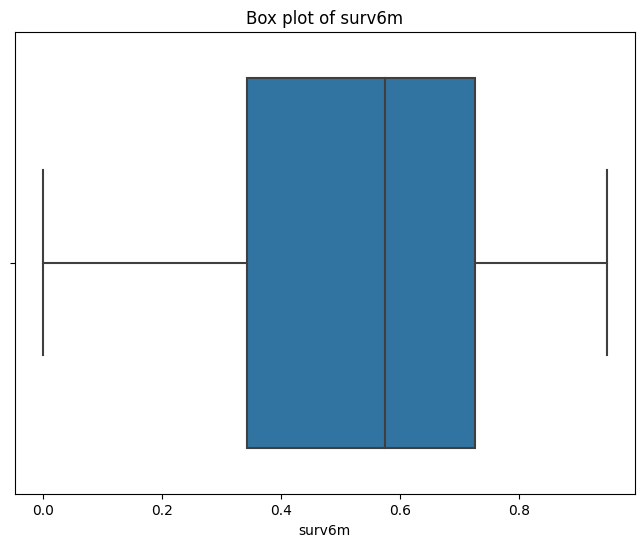

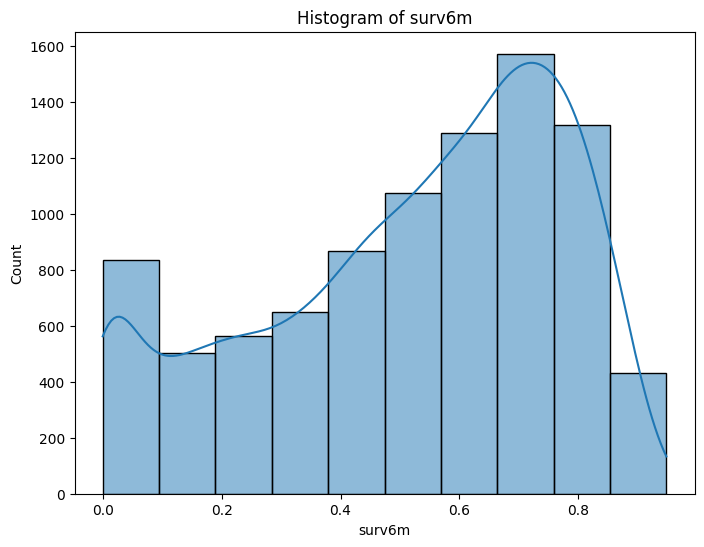

In [70]:
data_exploration(data, 'surv6m')
#not to be used a predictor 
#drop one missing row 

## hday

Mean of hday: 4.40
Standard deviation of hday: 9.13
Number of outliers in hday: 1118
Outliers values:
[148  13  29 ...  13  18  22]


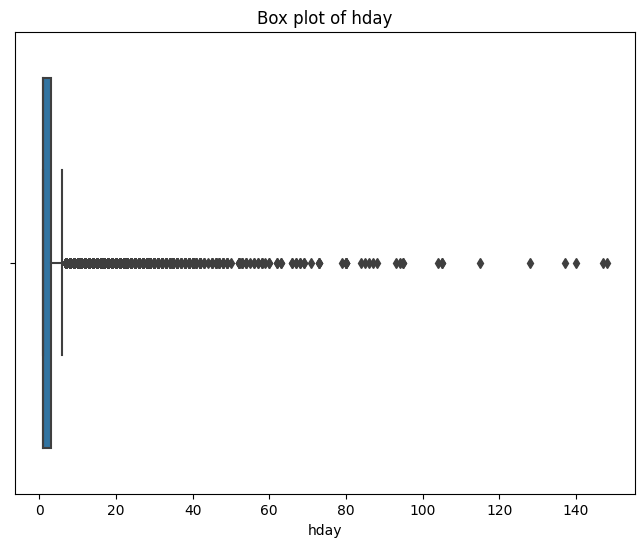

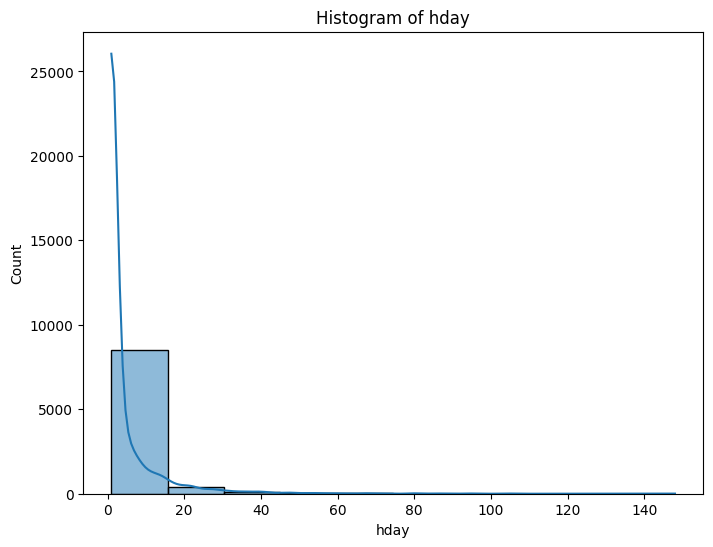

In [71]:
data_exploration(data, 'hday')

In [74]:
data['hday'].value_counts(dropna=False, ascending=False).sort_index

<bound method Series.sort_index of hday
1      5948
2       496
3       398
4       315
5       218
       ... 
44        1
147       1
50        1
85        1
59        1
Name: count, Length: 85, dtype: int64>

## diabetes

Counts and percentages of unique values in diabetes:

          Count  Percentage
diabetes                   
0          7327   80.472268
1          1778   19.527732


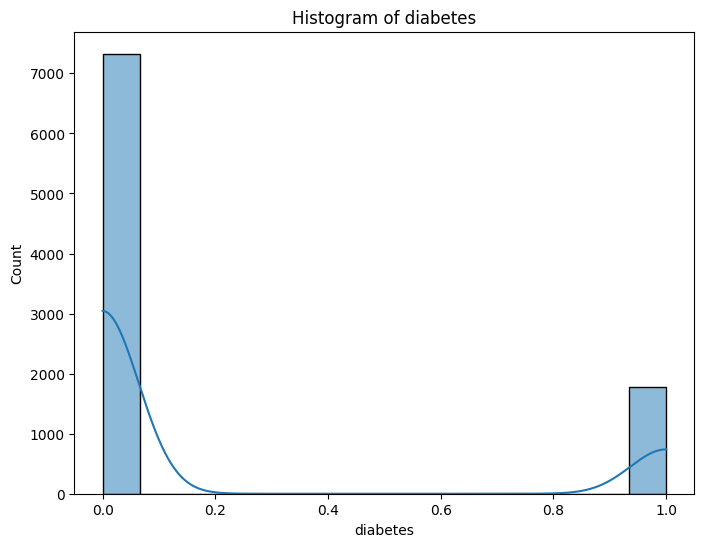

In [75]:
data_exploration(data, 'diabetes')

## dementia

Counts and percentages of unique values in dementia:

          Count  Percentage
dementia                   
0          8809   96.749039
1           296    3.250961


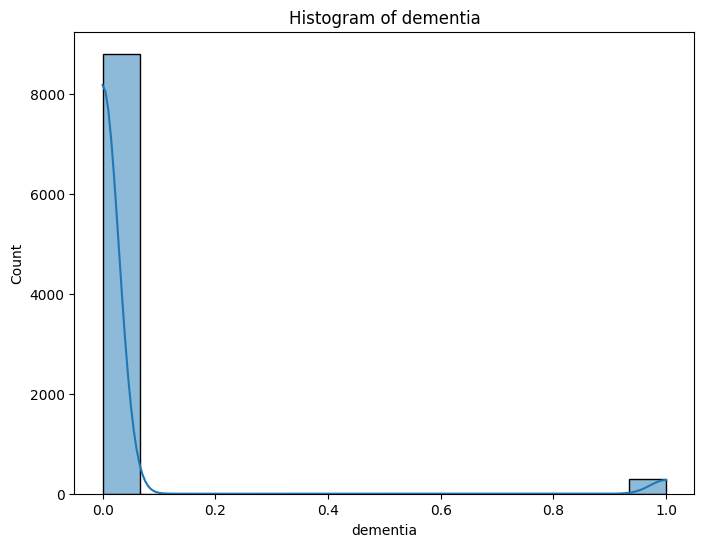

In [76]:
data_exploration(data, 'dementia')

## ca

Counts and percentages of unique values in ca:

            Count  Percentage
ca                           
no           5995   65.842943
metastatic   1858   20.406370
yes          1252   13.750686


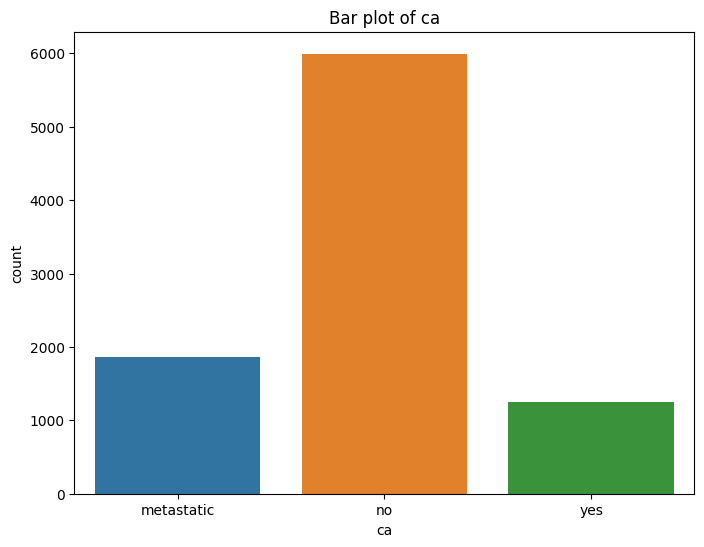

In [77]:
data_exploration(data, 'ca')
#Whether the patient has cancer (yes), whether it has spread out (metastatic), or if it is healthy (no).

## prg2m


Mean of prg2m: 0.62
Standard deviation of prg2m: 0.30
Number of outliers in prg2m: 0
Outliers values:
[]


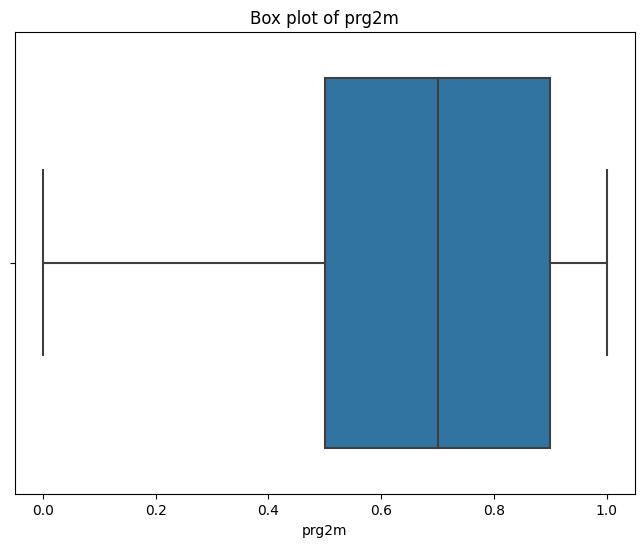

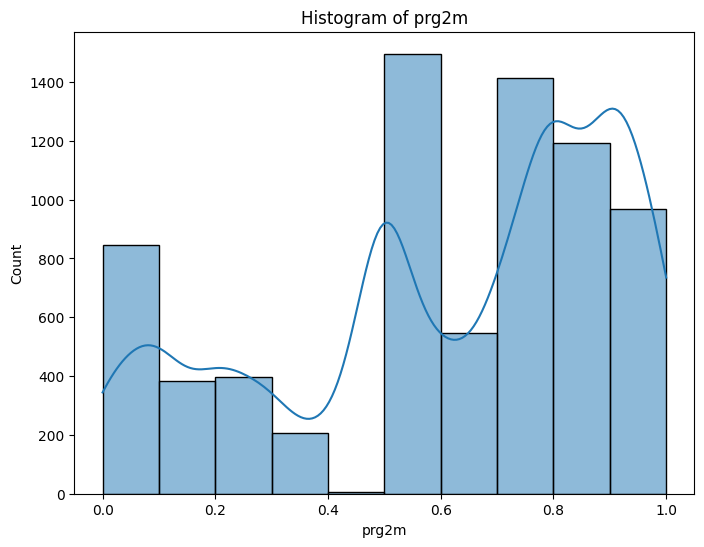

In [78]:
data_exploration(data, 'prg2m')
#?

## prg6m


Mean of prg6m: 0.50
Standard deviation of prg6m: 0.30
Number of outliers in prg6m: 0
Outliers values:
[]


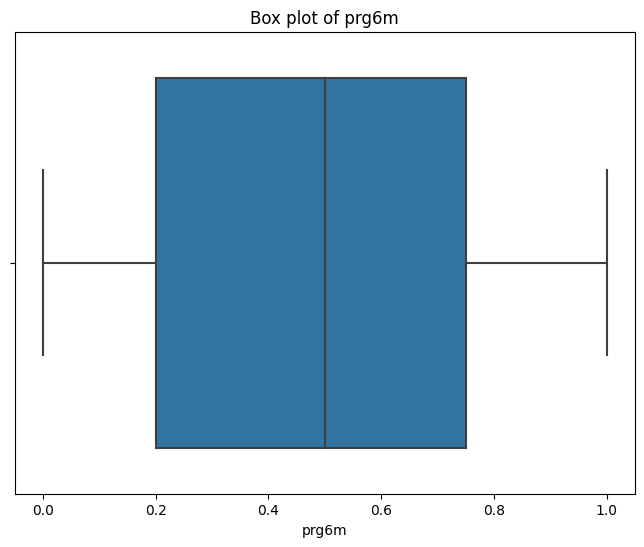

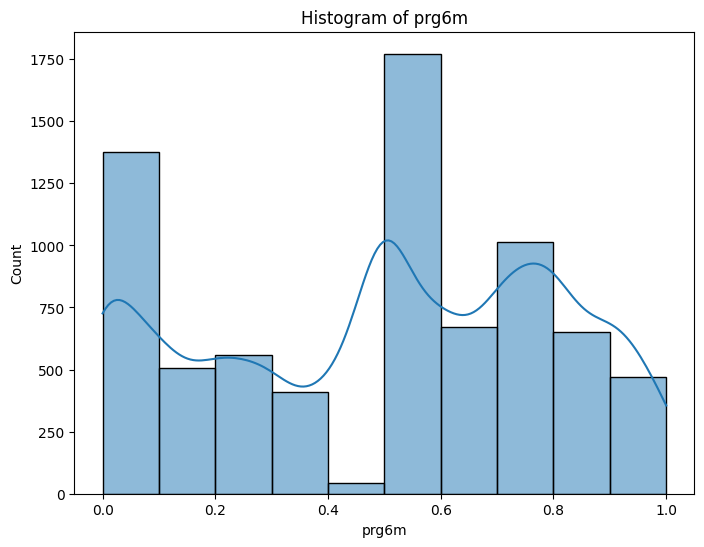

In [79]:
data_exploration(data, 'prg6m')
#?

## dnr

Counts and percentages of unique values in dnr:

                 Count  Percentage
dnr                               
no dnr            5880   64.793388
dnr after sadm    2956   32.573003
dnr before sadm    239    2.633609


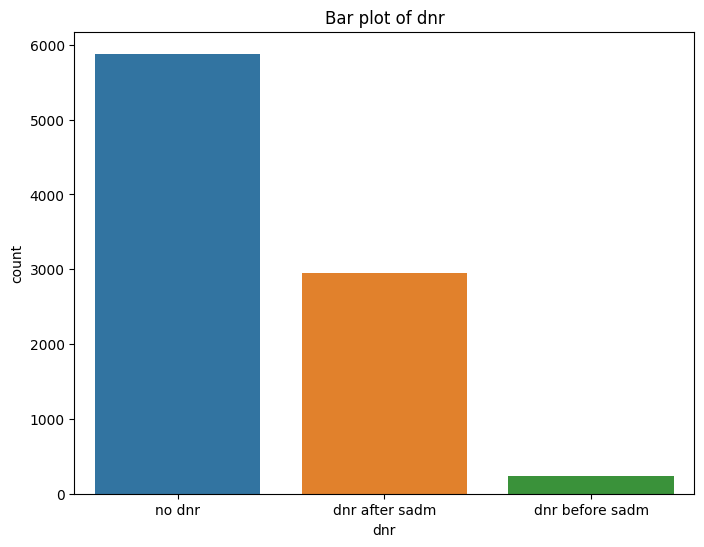

In [80]:
data_exploration(data, 'dnr')
#not 100% sure 
#multiple admissions (MADM) 
#single PICU admissions (SADM)
#drop

## dnrday

Mean of dnrday: 14.58
Standard deviation of dnrday: 19.94
Number of outliers in dnrday: 332
Outliers values:
[115. 105.  61.  72. 120.  67.  90.  85. 106. 281.  96. 116.  81.  76.
  61. 162.  64.  62.  72.  74. 118. 145.  69.  93.  66. 103.  99.  74.
  59. 128. 124.  88.  71.  82.  63.  86.  57.  91.  93.  64.  58.  99.
  73.  60. 107.  71. 122.  81.  94.  93.  73.  82.  81.  71.  61.  69.
  60.  59. 107.  71.  85. 118.  62.  58.  64.  64.  73. 168.  68. 128.
 172.  62.  72. 114. 111. 120.  68. 121. 100.  57.  63.  67. 115.  61.
  61.  87.  95.  74.  58. 106. 226.  90.  76.  66.  75. 110. 100. 127.
  65.  73.  65. 154.  86.  79.  82.  67.  93. 109. 136.  70.  90. 223.
  60. 148.  84.  69.  61.  71. 110.  60. 117.  92.  88. 245.  66. 207.
  90.  77. 113.  62.  59. 126. 134.  88.  67.  68.  60.  65.  95.  81.
  62.  73.  91. 117. 145.  82.  59.  78. 148. 261.  99.  75. 116.  62.
 100.  81. 104.  90.  81. 101. 110.  74. 113.  57.  79.  78.  87.  85.
  63.  93.  71.  69.  61.  74. 185.  66

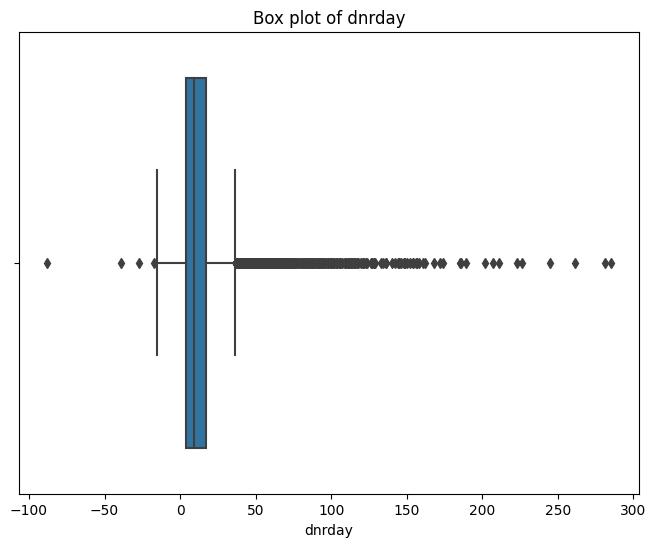

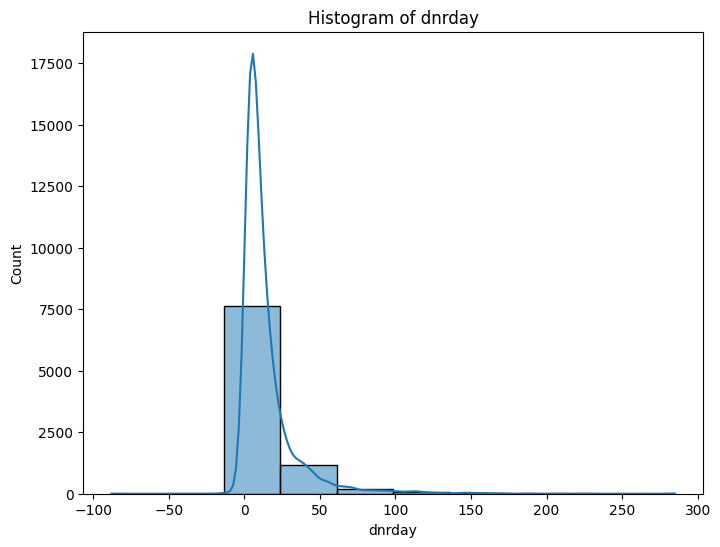

In [81]:
data_exploration(data, 'dnrday')
# <0 if before study
#drop 

## meanbp

Mean of meanbp: 84.55
Standard deviation of meanbp: 27.69
Number of outliers in meanbp: 0
Outliers values:
[]


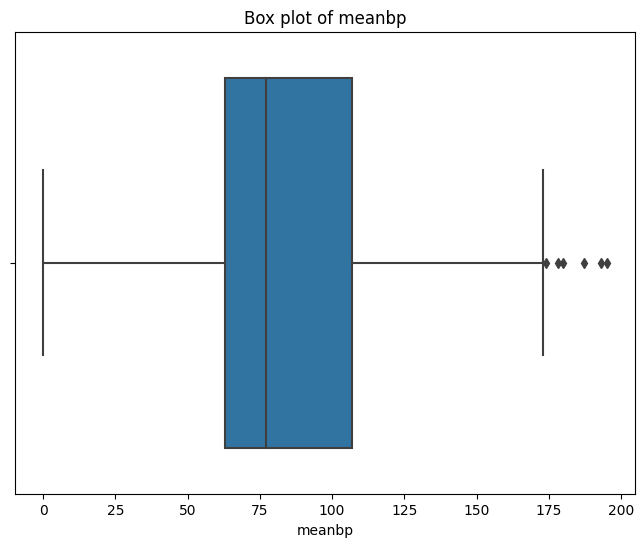

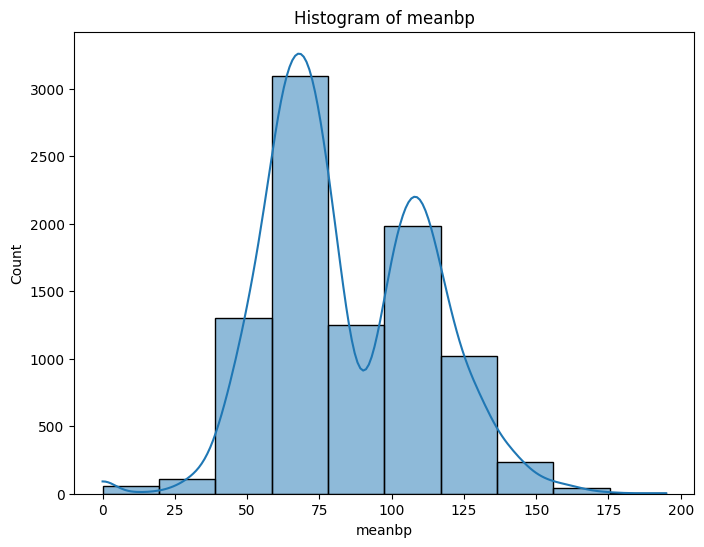

In [91]:
data_exploration(data, 'meanbp')
#drop one missing row 

## wblc

Mean of wblc: 12.27
Standard deviation of wblc: 9.17
Number of outliers in wblc: 129
Outliers values:
[ 51.1953125  65.         49.8984375  79.1875     39.796875   50.59375
 100.         55.         41.5        44.796875   41.1953125  42.09375
  40.796875  112.1875    110.         44.         46.5        44.5
 100.         43.09375    67.296875   41.1953125  45.         99.
  58.1953125  80.59375    41.         93.890625   63.         42.09375
  78.796875   80.         55.59375   117.         61.296875   52.
  42.8984375  58.59375    44.09375   100.         50.09375    80.09375
  60.09375    42.3984375  50.         49.3984375  42.6953125  49.6953125
  41.5        46.5        57.796875   65.6875     68.5        43.09375
  95.296875   60.         51.3984375  39.59375   100.         67.09375
  78.1875     52.09375    79.390625   45.5        71.890625   43.1953125
  41.296875   40.         46.8984375  52.296875   46.296875  128.78125
  45.8984375  55.8984375  48.5        64.890625   63.5  

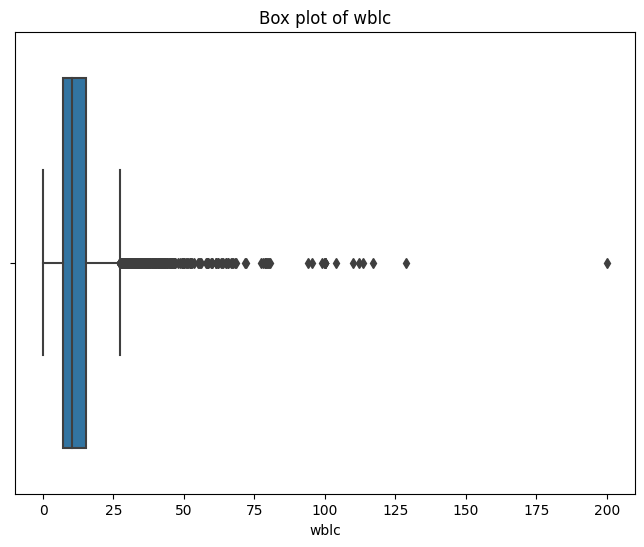

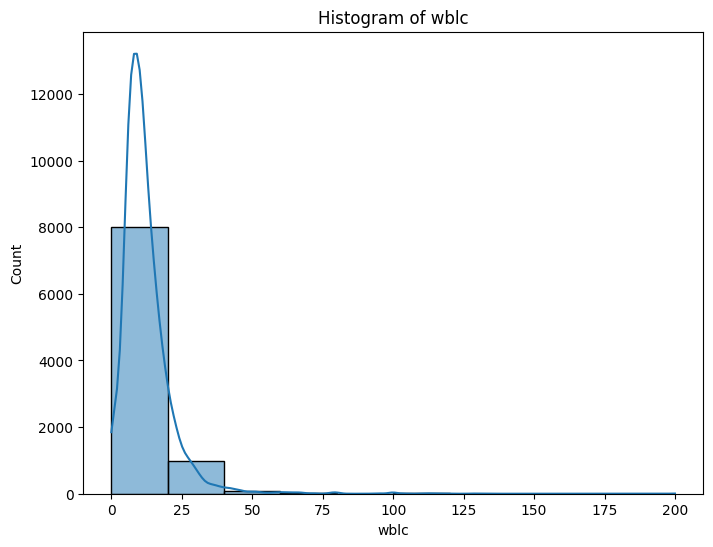

In [38]:
data_exploration(data, 'wblc')
#check normal values for imputation

In [153]:
data['wblc'] = data['wblc'].fillna(value=9)

## hrt

Mean of hrt: 97.16
Standard deviation of hrt: 31.56
Number of outliers in hrt: 1
Outliers values:
[300.]


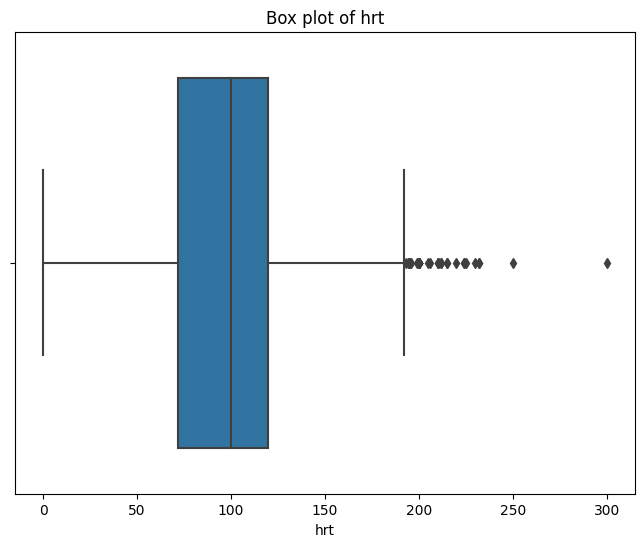

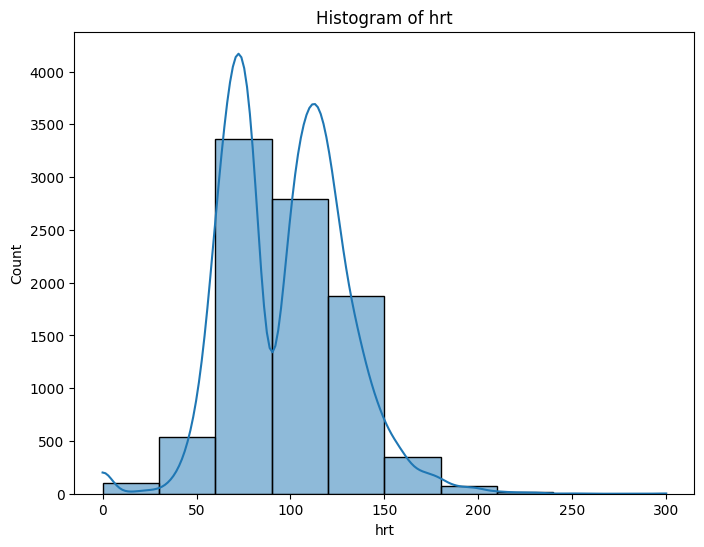

In [93]:
data_exploration(data, 'hrt')
#drop one missing value 

## resp

Mean of resp: 23.33
Standard deviation of resp: 9.57
Number of outliers in resp: 23
Outliers values:
[70. 60. 90. 60. 68. 60. 60. 75. 60. 60. 60. 67. 60. 60. 60. 72. 60. 60.
 60. 64. 76. 76. 60.]


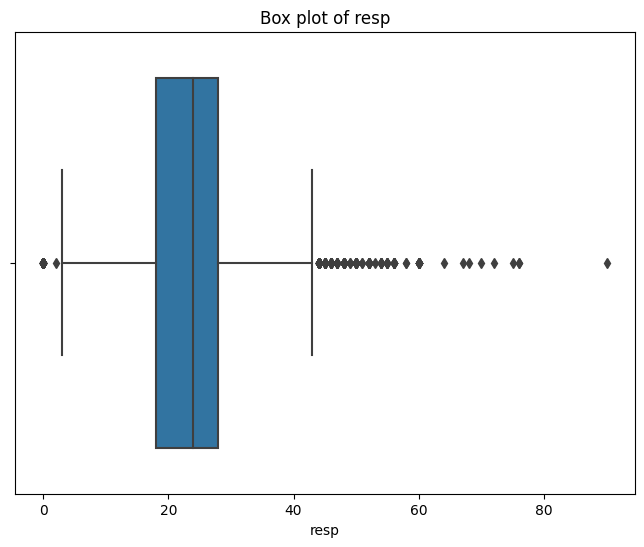

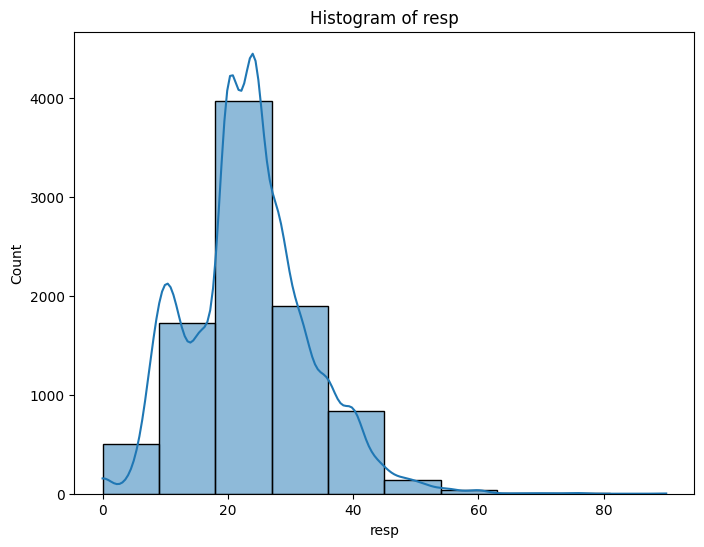

In [96]:
data_exploration(data, 'resp')
#drop one missin value

## temp

Mean of temp: 37.10
Standard deviation of temp: 1.25
Number of outliers in temp: 0
Outliers values:
[]


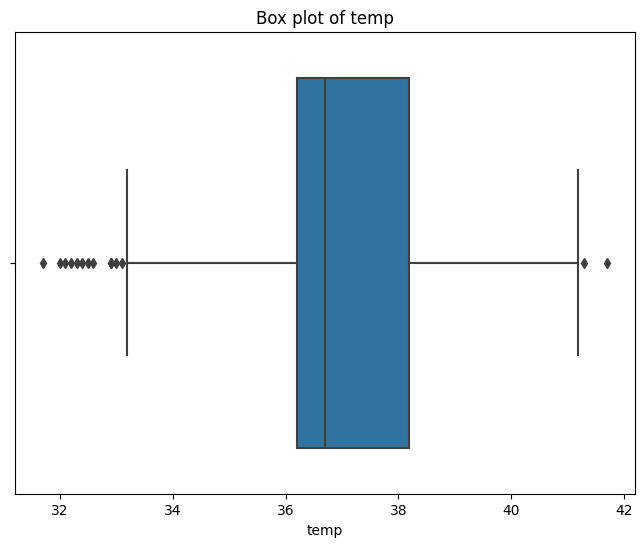

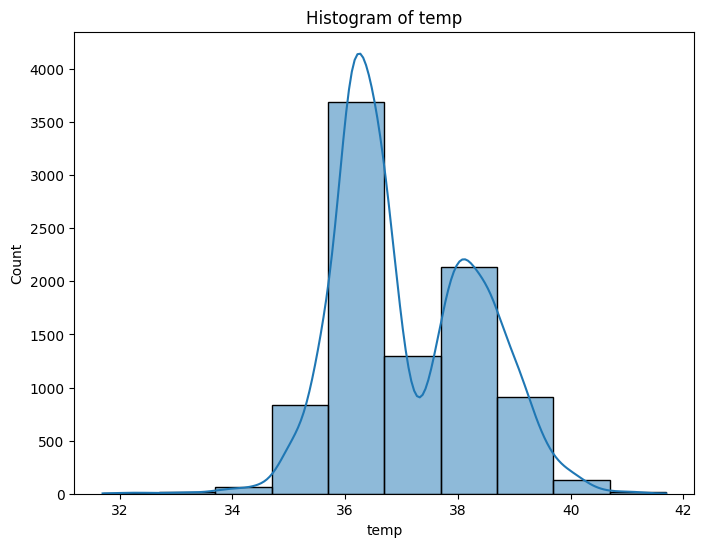

In [97]:
data_exploration(data, 'temp')
#drop one missing value

## pafi

Mean of pafi: 263.47
Standard deviation of pafi: 103.09
Number of outliers in pafi: 4
Outliers values:
[819.    869.375 890.375 795.125]


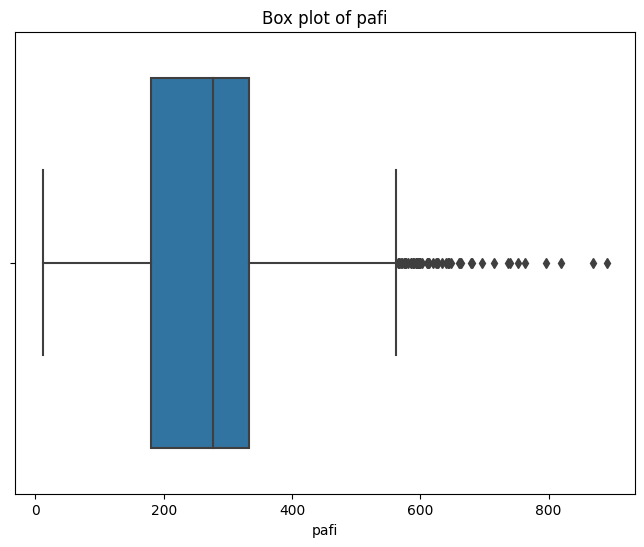

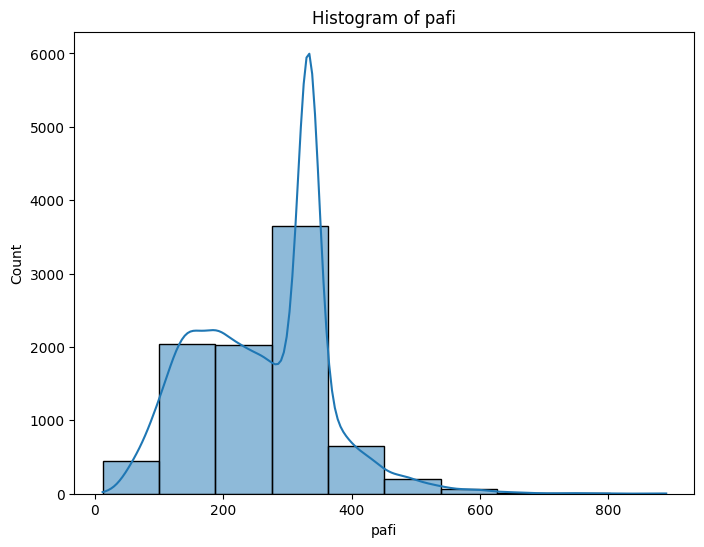

In [30]:
data_exploration(data, 'pafi')


In [150]:
#impute missing values with 333.3
data['pafi'] = data['pafi'].fillna(value=333.3)


## alb

Mean of alb: 3.15
Standard deviation of alb: 0.74
Number of outliers in alb: 5
Outliers values:
[ 6.        29.         8.5996094  6.2998047 10.8984375]


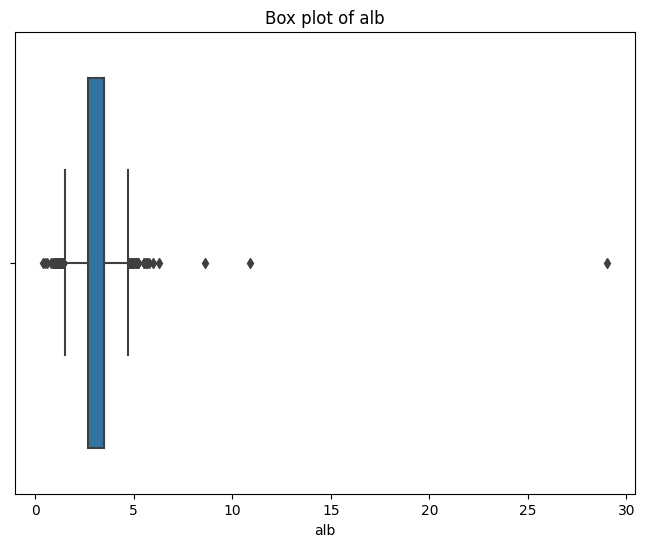

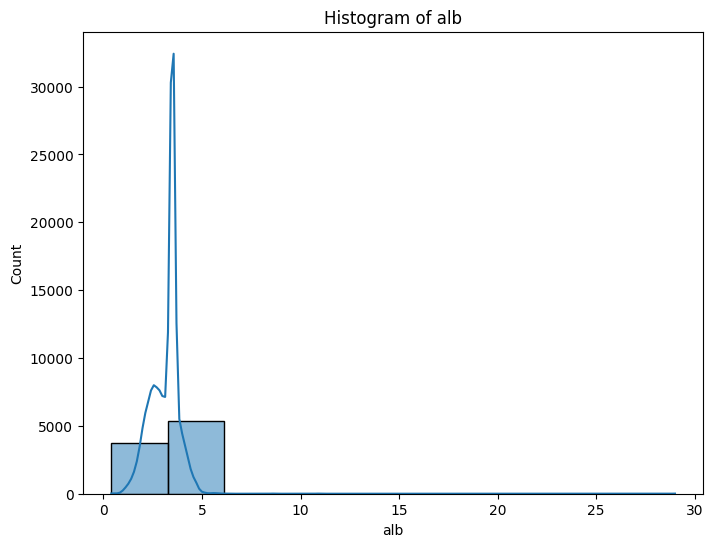

In [27]:
data_exploration(data, 'alb')


In [147]:
#impute mising values with 3.5
data['alb'] = data['alb'].fillna(value=3.5)

## bili

Mean of bili: 2.11
Standard deviation of bili: 4.55
Number of outliers in bili: 1071
Outliers values:
[ 6.09960938 14.         12.7988281  ...  4.5         4.89941406
  8.19921875]


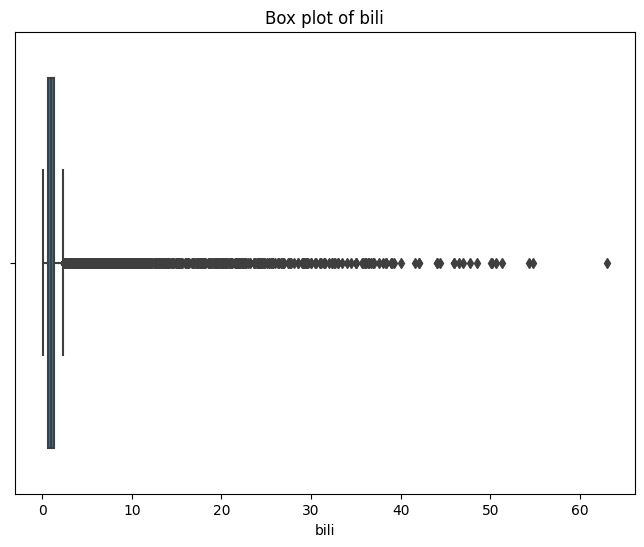

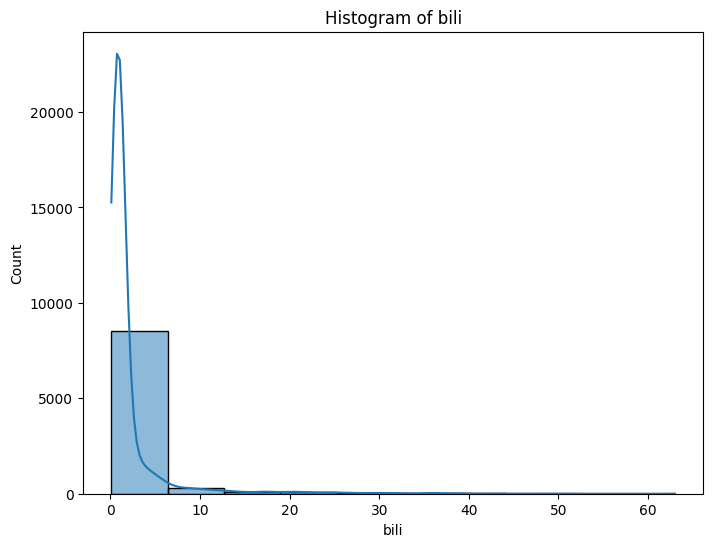

In [32]:
data_exploration(data, 'bili')


In [148]:
#impute missing values for bili with 1.01
data['bili'] = data['bili'].fillna(value=1.01)

## crea

Mean of crea: 1.77
Standard deviation of crea: 1.68
Number of outliers in crea: 537
Outliers values:
[ 5.5         6.          7.29980469  7.69921875  5.19921875  7.59960938
  5.79980469  8.59960938 10.6992188   5.69921875  5.39941406  5.69921875
  6.69921875  5.5         9.09960938 10.5         5.5         5.79980469
  5.5         5.79980469  5.69921875  7.39941406  7.69921875  5.09960938
  5.         12.          5.39941406  5.69921875  7.29980469  7.79980469
  7.09960938  5.59960938  8.79882812  7.29980469  5.39941406  5.
  8.8984375   6.5         9.09960938  5.89941406  5.09960938  8.19921875
  5.89941406  6.59960938  5.19921875  7.39941406  5.          7.79980469
 10.7988281   6.79980469  8.          6.19921875  5.19921875  5.59960938
  5.5         6.29980469  5.          5.          5.39941406  7.5
  6.79980469  5.5         9.3984375   6.09960938  6.89941406  7.29980469
  6.79980469  6.39941406  5.19921875 10.          6.39941406  6.69921875
  6.19921875  7.19921875  7.          

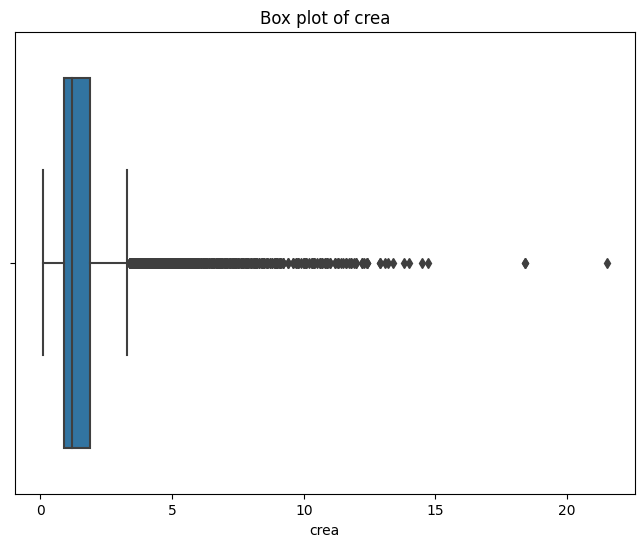

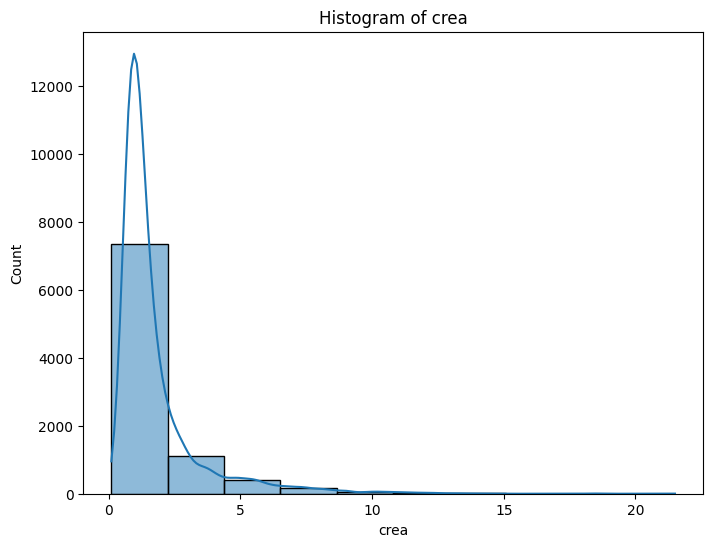

In [34]:
data_exploration(data, 'crea')
#normal values for imputation

In [151]:
data['crea'] = data['crea'].fillna(value=1.01)

## sod

Mean of sod: 137.57
Standard deviation of sod: 6.03
Number of outliers in sod: 16
Outliers values:
[111. 163. 168. 112. 163. 168. 175. 164. 164. 181. 166. 173. 112. 164.
 110. 165.]


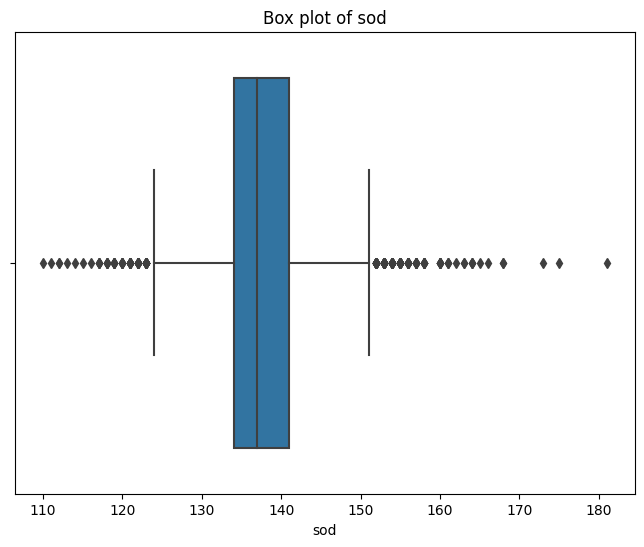

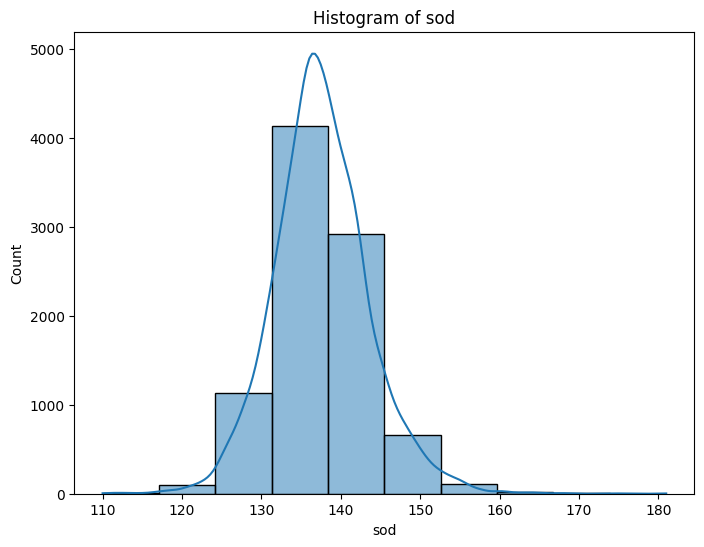

In [104]:
data_exploration(data, 'sod')
#drop one missing value 

## ph

Mean of ph: 7.42
Standard deviation of ph: 0.08
Number of outliers in ph: 37
Outliers values:
[7.069336 7.079102 7.069336 6.939453 7.089844 7.069336 7.089844 7.109375
 7.109375 6.959961 7.089844 6.959961 6.969727 7.089844 7.069336 7.109375
 7.099609 7.109375 7.069336 7.089844 6.90918  6.919922 7.05957  7.069336
 6.929688 6.989258 7.069336 6.969727 7.109375 7.069336 7.099609 7.019531
 7.029297 7.089844 7.05957  7.769531 6.829102]


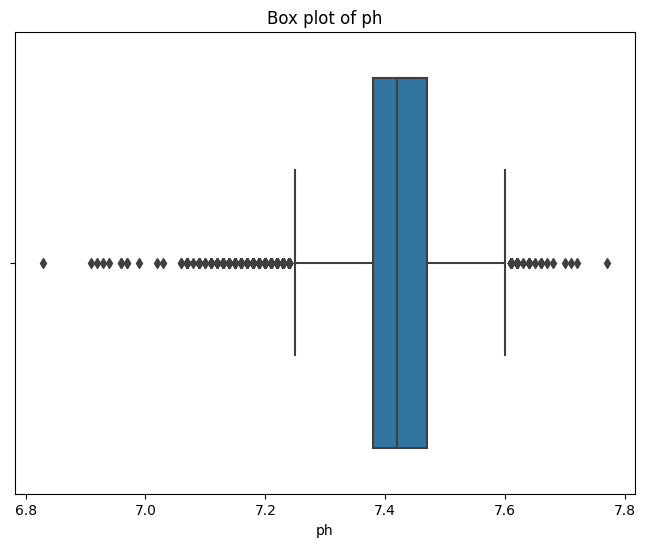

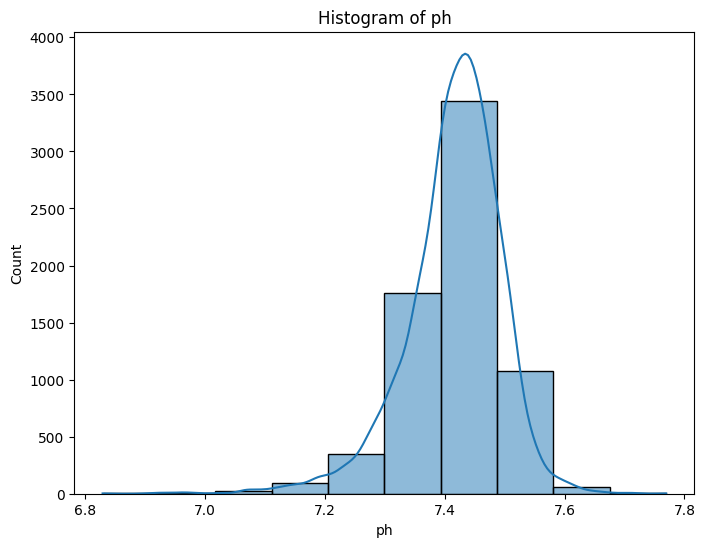

In [105]:
data_exploration(data, 'ph')
#

## glucose

Mean of glucose: 159.87
Standard deviation of glucose: 88.39
Number of outliers in glucose: 54
Outliers values:
[ 658.  841.  476.  508.  598.  584.  597.  617.  513.  462.  492.  648.
  468.  651.  502.  508.  719.  477.  547.  599.  943. 1092.  528.  537.
  498.  561.  668.  474.  520.  971.  687.  705.  536.  535.  507.  527.
  498.  446.  546.  512.  543.  661.  621.  611. 1051.  516.  551.  576.
  511.  478.  686.  463.  535.  446.]


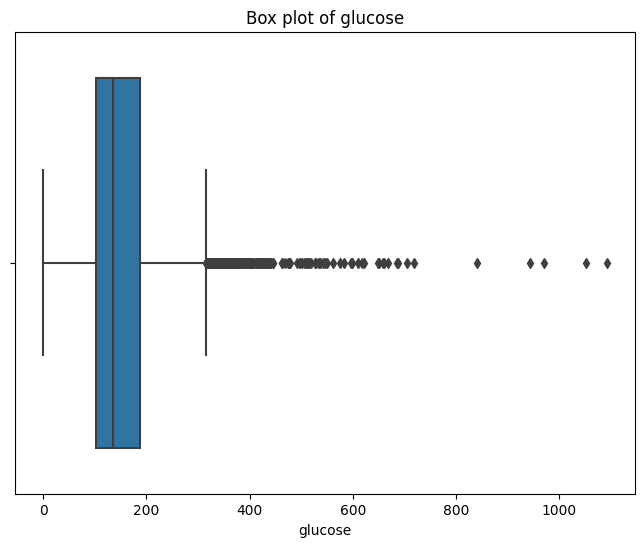

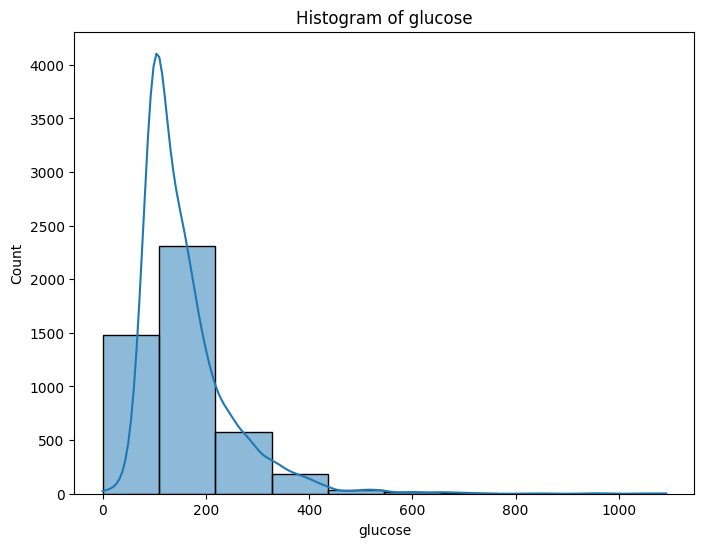

In [106]:
data_exploration(data, 'glucose')

## bun

Mean of bun: 20.00
Standard deviation of bun: 23.27
Number of outliers in bun: 367
Outliers values:
[ 95.  81.  98.  85. 112.  78. 101.  96.  99.  77. 101.  87.  92. 111.
  95.  83.  84. 100. 101. 150. 115. 115.  77. 131. 103.  90.  86. 115.
  98.  90.  80. 115. 125.  78.  78.  94. 116.  78. 147. 123. 107. 120.
  86. 104.  80. 125.  89.  87. 136.  84. 166. 110.  99.  85.  93.  95.
 101.  77.  89. 119. 111.  96.  79.  91.  90.  96.  90. 112.  87.  77.
  92.  83.  80. 130. 170. 125. 108.  79.  88.  81.  78. 130.  89. 117.
  83.  80.  78.  77.  98.  97.  90. 111. 139. 125.  85.  77. 108. 115.
  78. 147.  94.  81. 107.  82.  83. 116.  83. 178.  86.  99. 105.  85.
  89.  84.  97. 129.  86.  91.  78.  80. 109. 127. 138.  82.  90.  82.
  78.  79. 106.  82.  83.  79. 146. 103. 300.  88.  81. 119.  78.  90.
  82. 116.  79.  93. 112. 174.  87. 137.  82. 116.  92. 118.  89.  96.
  78.  79. 110.  89.  82. 104.  97.  92.  81.  98. 106.  86. 103. 121.
  90. 103. 120. 122. 128. 110. 117.  99.  99.  9

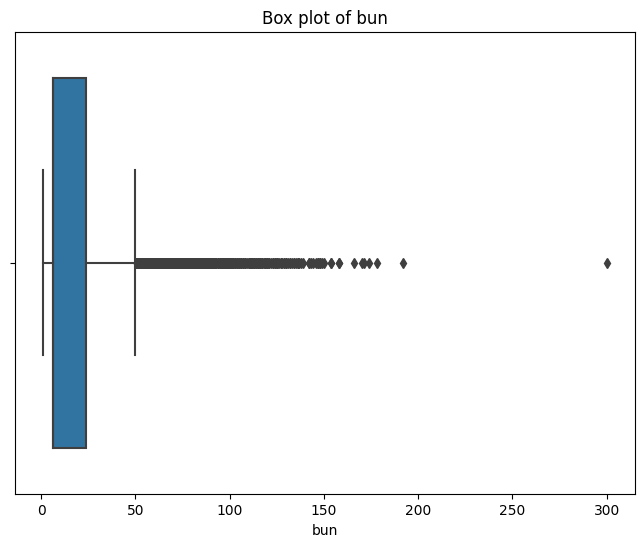

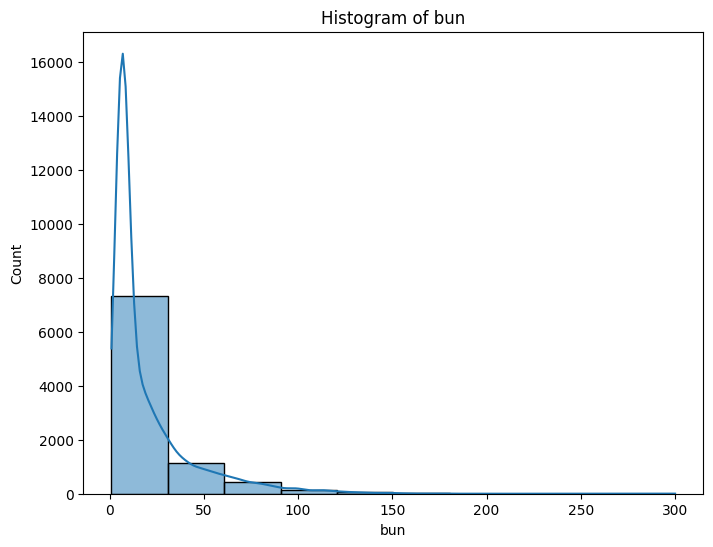

In [36]:
data_exploration(data, 'bun')
#normal values for impute

In [154]:
data['bun'] = data['bun'].fillna(value=6.51)

## urine

Mean of urine: 2357.33
Standard deviation of urine: 1005.36
Number of outliers in urine: 1204
Outliers values:
[ 360. 5040. 6500. ... 3828.    0. 3900.]


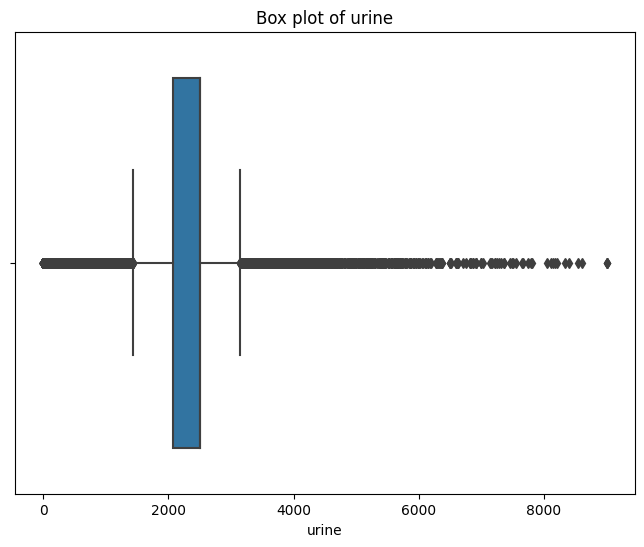

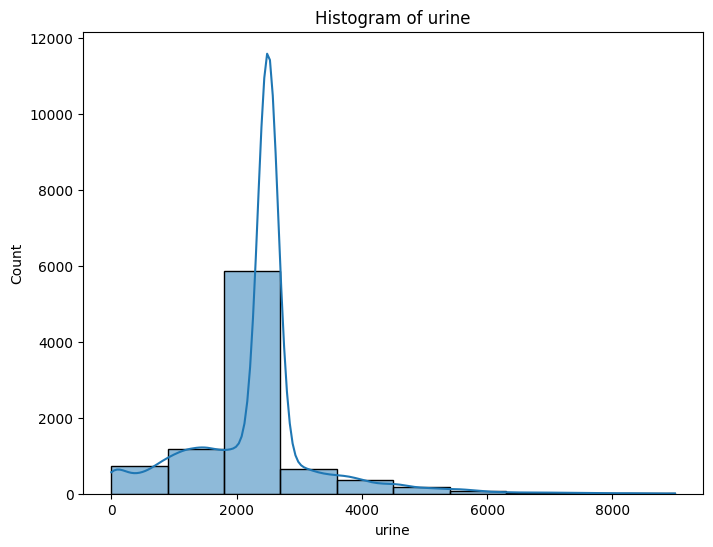

2502

In [40]:
data_exploration(data, 'urine')
#normal values for impute

In [155]:
data['urine'] = data['urine'].fillna(value=2502)

## adlp

Counts and percentages of unique values in adlp:

      Count  Percentage
adlp                   
0.0    1849   53.377598
1.0     711   20.525404
2.0     332    9.584296
3.0     150    4.330254
5.0     149    4.301386
4.0     124    3.579677
6.0      98    2.829099
7.0      51    1.472286


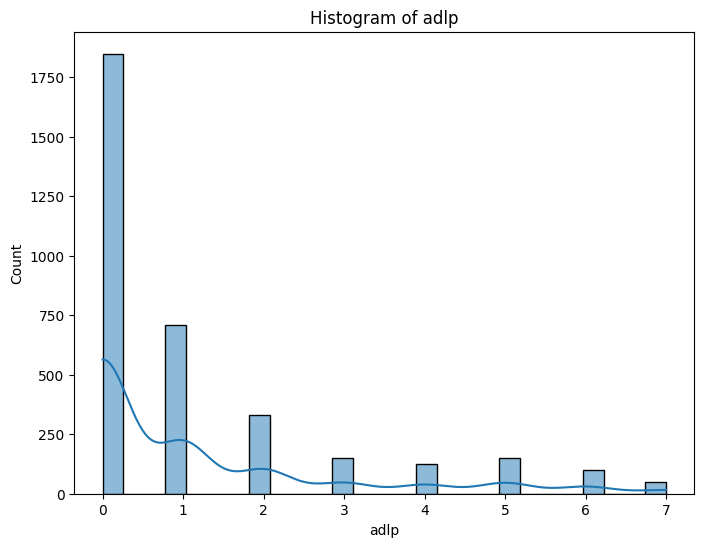

In [109]:
data_exploration(data, 'adlp')

## adls

Counts and percentages of unique values in adls:

      Count  Percentage
adls                   
0.0    3108   49.823661
1.0    1031   16.527733
2.0     469    7.518435
6.0     403    6.460404
5.0     343    5.498557
3.0     327    5.242065
7.0     301    4.825265
4.0     256    4.103879


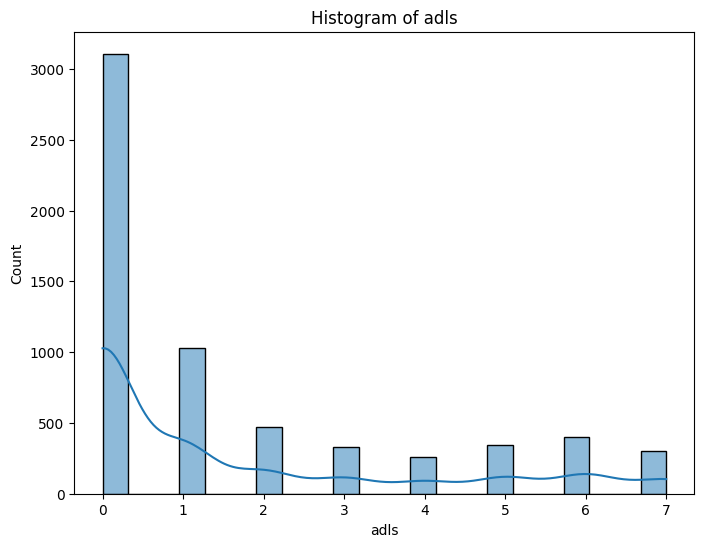

In [110]:
data_exploration(data, 'adls')

## sfdm2

Counts and percentages of unique values in sfdm2:

                     Count  Percentage
sfdm2                                 
<2 mo. follow-up      3123   40.532122
no(M2 and SIP pres)   3061   39.727450
adl>=4 (>=5 if sur)    916   11.888384
SIP>=30                564    7.319922
Coma or Intub           41    0.532122


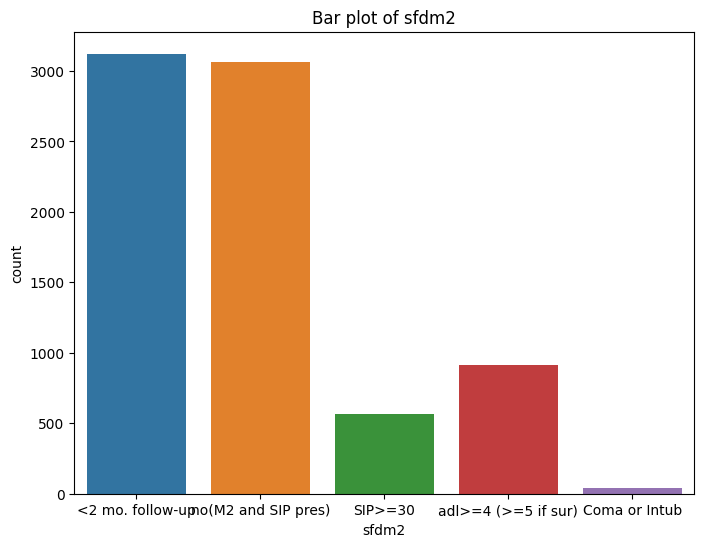

In [111]:
data_exploration(data, 'sfdm2')
#chcek section for more

## adlsc

Mean of adlsc: 1.89
Standard deviation of adlsc: 2.00
Number of outliers in adlsc: 0
Outliers values:
[]


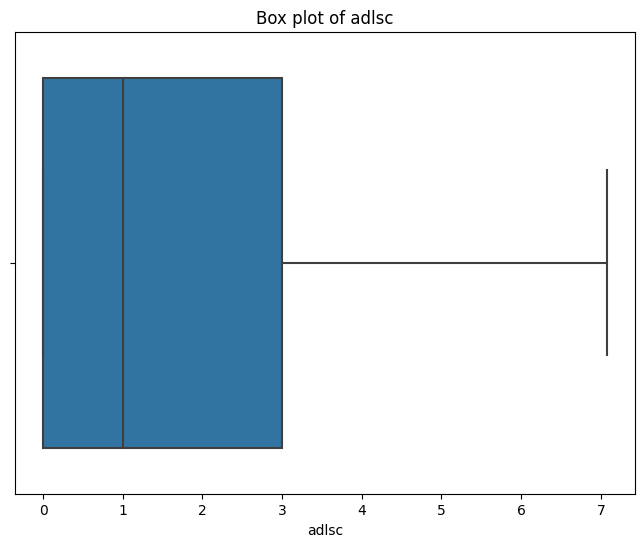

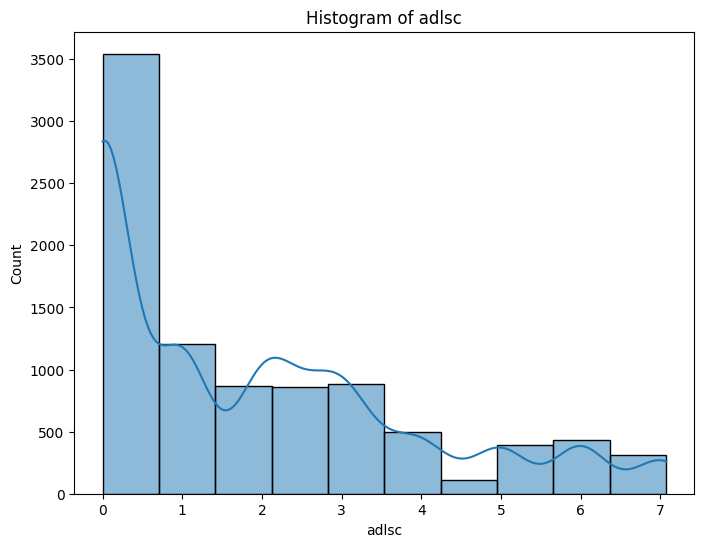

In [112]:
data_exploration(data, 'adlsc')